# **California Housing Price Prediction**

The **objective** of this project is to **develop a predictive model that accurately estimates house prices in California** based on various housing attributes and socioeconomic factors. This model will assist in making informed investment decisions, pricing strategies, and understanding market trends. The **primary focus** is on **minimizing the Root Mean Squared Percentage Error (RMSPE) to ensure the model has low-level errors when predicting new data**.

## 1. Data Understanding

### Dataset Overview

The California Housing dataset was derived from the 1990 U.S. Census. It contains information on various housing and demographic characteristics of California districts, often referred to as block groups, the smallest geographical unit for which the U.S. Census Bureau publishes sample data. This dataset is widely used for regression tasks and machine learning applications, particularly for predicting median house values based on different features.

The dataset consists of 14,448 entries and 10 columns. Here are the descriptions of the columns:
- **longitude**: A float value representing the longitudinal coordinate of the district.
- **latitude**: A float value representing the latitudinal coordinate of the district.
- **housing_median_age**: A float value indicating the median age of the houses in the district.
- **total_rooms**: A float value indicating the total number of rooms in all houses within the district.
- **total_bedrooms**: A float value indicating the total number of bedrooms in all houses within the district.
- **population**:  A float value indicating the total population of the district.
- **households**: A float value indicating the total number of households in the district.
- **median_income**: A float value indicating the median income of the district's residents, scaled in tens of thousands of dollars.
- **ocean_proximity**: A categorical value indicating the district's proximity to the ocean. The categories include:
    - "NEAR BAY"
    - "<1H OCEAN"
    - "INLAND"
    - "NEAR OCEAN"
    - "ISLAND"
- **median_house_value**: A float value indicating the median house value for the district, scaled in hundreds of thousands of dollars. (the target variable).

### Key Insights
- **Geographical Distribution**: The dataset includes geographical coordinates (latitude and longitude) which can be used to plot and analyze the spatial distribution of house values and other attributes across California.
- **Ocean Proximity**: This categorical feature indicates the district's proximity to the ocean and includes categories like "NEAR BAY", "<1H OCEAN", "INLAND", "NEAR OCEAN", and "ISLAND". It is useful for examining the influence of proximity to water bodies on house prices.
- **Demographic and Housing Attributes**: Attributes such as median income, house age, total rooms, and population provide insights into the demographic and housing characteristics of each district, which are crucial for predictive modeling.

## 2. Business Problem and Goals

### Business Problem

The **real estate market in California is highly dynamic** and **influenced by numerous factors** such as location, socioeconomic status, housing characteristics, and proximity to amenities like the ocean. **Accurate prediction of house prices** is crucial for various stakeholders, including real estate investors, home buyers, policymakers, and financial institutions.

**Main Objective**: To predict median house values to help real estate investors identify potential high-value investment opportunities.

### Goals

1. **Develop a Predictive Model for House Prices**:
   - **Objective**: Build and evaluate different regression models to predict the median house value in California based on the available dataset.
   - **Outcome**: Identify the best-performing model that provides accurate and reliable predictions of house prices.

2. **Analyze Key Factors Influencing House Prices**:
   - **Objective**: Perform feature importance analysis to understand which factors most significantly impact house prices.
   - **Outcome**: Gain insights into the primary drivers of house prices, such as proximity to the ocean, median income, and housing characteristics.

3. **Optimize Data Handling Techniques**:
   - **Objective**: Implement and compare various data preprocessing techniques, including outlier handling, missing value imputation, and data transformation, to enhance model performance.
   - **Outcome**: Determine the most effective preprocessing methods that improve model accuracy and robustness.

4. **Evaluate Model Performance Using Multiple Metrics**:
   - **Objective**: Assess the models using a comprehensive set of evaluation metrics, including MAE, MSE, RMSE, MAPE, RMSPE, and R-squared.
   - **Outcome**: Ensure a thorough evaluation to select the model that balances accuracy, interpretability, and computational efficiency.

5. **Provide Actionable Insights for Stakeholders**:
   - **Objective**: Translate model results into actionable insights for stakeholders such as real estate investors, home buyers, and policymakers.
   - **Outcome**: Enable stakeholders to make data-driven decisions regarding real estate investments, pricing strategies, and market analysis.

## 3. Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR, OneClassSVM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
# Load the dataset
data_path = "data_california_house.csv"
data = pd.read_csv(data_path)
pd.set_option('display.max_colwidth', None)

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


### Summary statistics

In [5]:
# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
           longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   

**Insight:**
The summary statistics provide a quick overview of the dataset. For instance, the mean median house value is approximately $206,336, with a standard deviation of $110,467. The median income ranges from 0.5 to 15.0, indicating a diverse range of income levels.

### Correlation matrix

**Visualization**:

C:\Users\Hadi\AppData\Local\Temp\ipykernel_13572\1206558871.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ocean_proximity'] = data['ocean_proximity'].replace({'ISLAND': 0, 'NEAR OCEAN': 1, '<1H OCEAN': 2, 'NEAR BAY': 3, 'INLAND': 4})


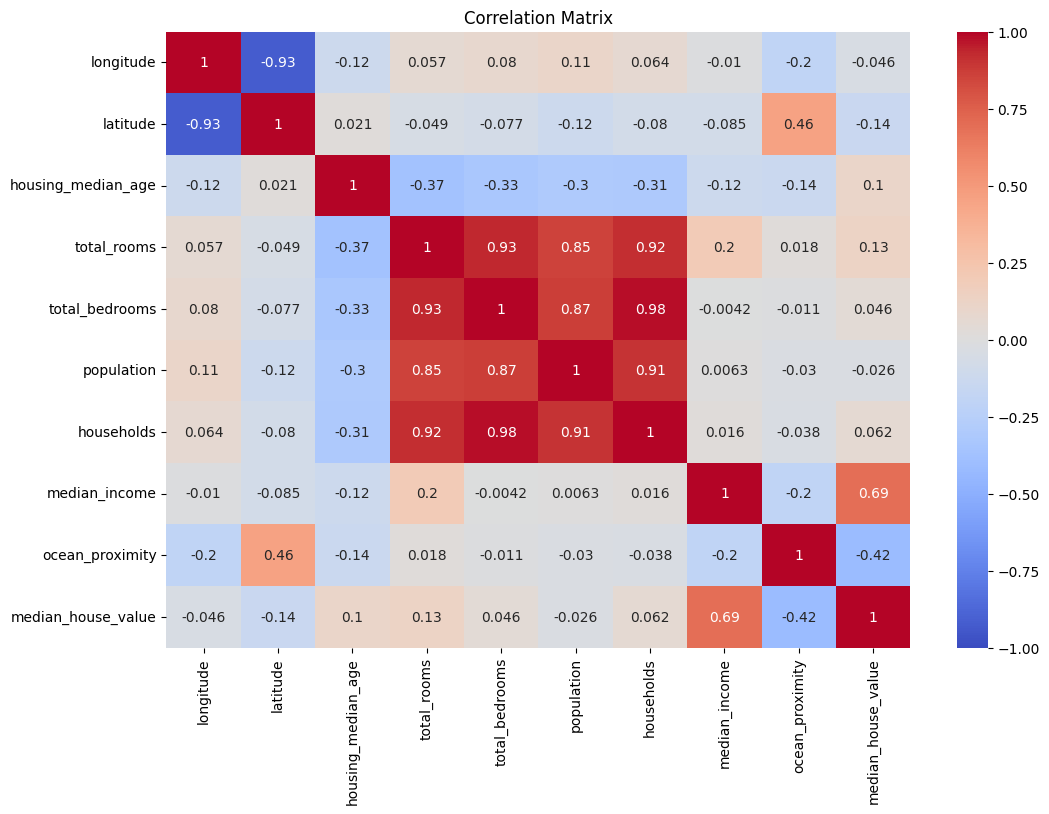

In [6]:
# Correlation matrix
data['ocean_proximity'] = data['ocean_proximity'].replace({'ISLAND': 0, 'NEAR OCEAN': 1, '<1H OCEAN': 2, 'NEAR BAY': 3, 'INLAND': 4})
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Insight:**
Strong correlations exist between median house value and median income (positive correlation), indicating higher incomes are associated with higher house values. Other notable correlations include total rooms and total bedrooms with each other.

### Median house value vs. median income, ocean proximity, housing median age, Total rooms, Total bedrooms, Population, & Households

**Visualization**:

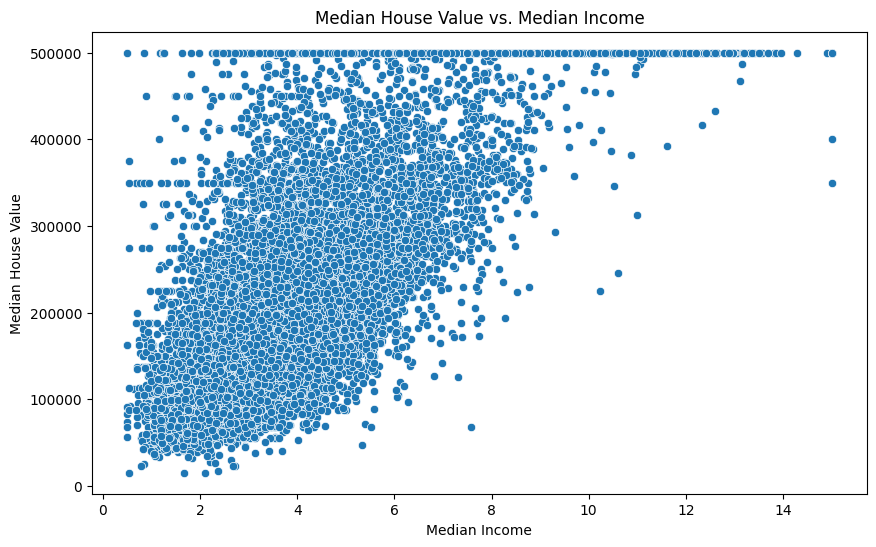

In [7]:
# Median house value vs. median income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

There is a clear positive relationship between median income and median house value. Higher income areas tend to have higher house values, which is crucial for identifying high-value investment areas.

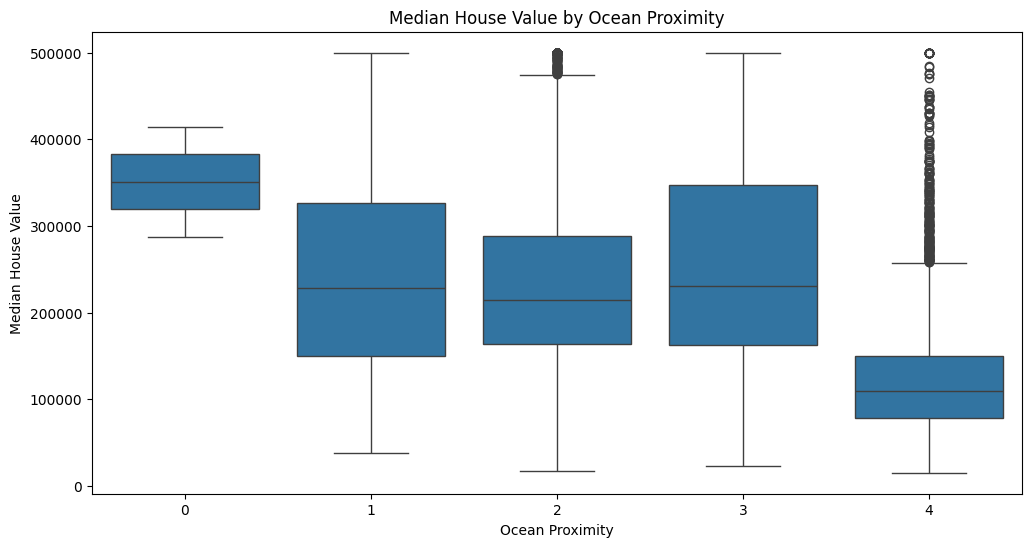

In [8]:
# Median house value by ocean proximity
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

Houses near the ocean, especially "NEAR BAY" and "ISLAND," generally have higher median values compared to inland houses. This indicates a premium for properties closer to the coast.

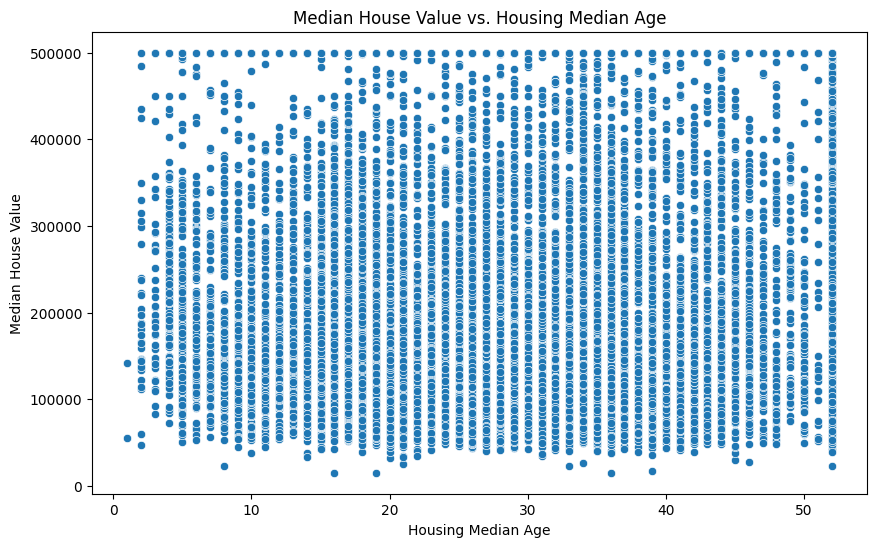

In [9]:
# Median house value vs. housing median age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='housing_median_age', y='median_house_value', data=data)
plt.title('Median House Value vs. Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()

There is a slight negative trend, suggesting that newer houses tend to have higher values. However, this relationship is not very strong.

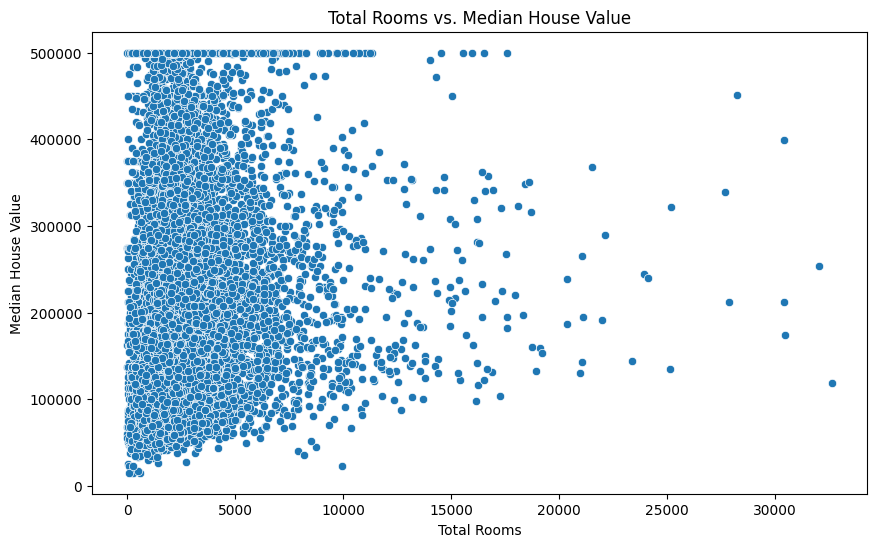

In [10]:
# Total rooms vs. median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='median_house_value', data=data)
plt.title('Total Rooms vs. Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.show()

There is a positive correlation between the number of rooms and house value. However, the relationship shows some variability, indicating that other factors also play a significant role.

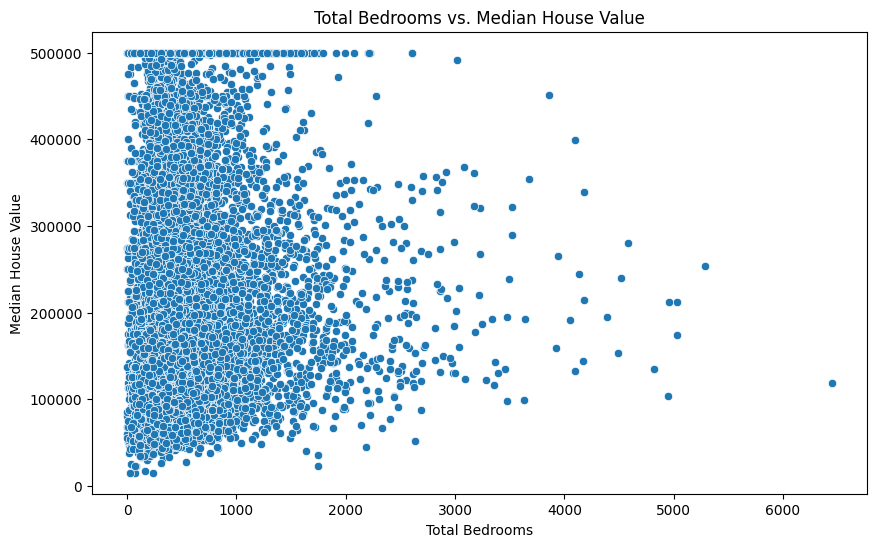

In [11]:
# Total bedrooms vs. median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=data)
plt.title('Total Bedrooms vs. Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.show()

Similar to total rooms, more bedrooms are associated with higher house values, but the relationship is not perfectly linear.

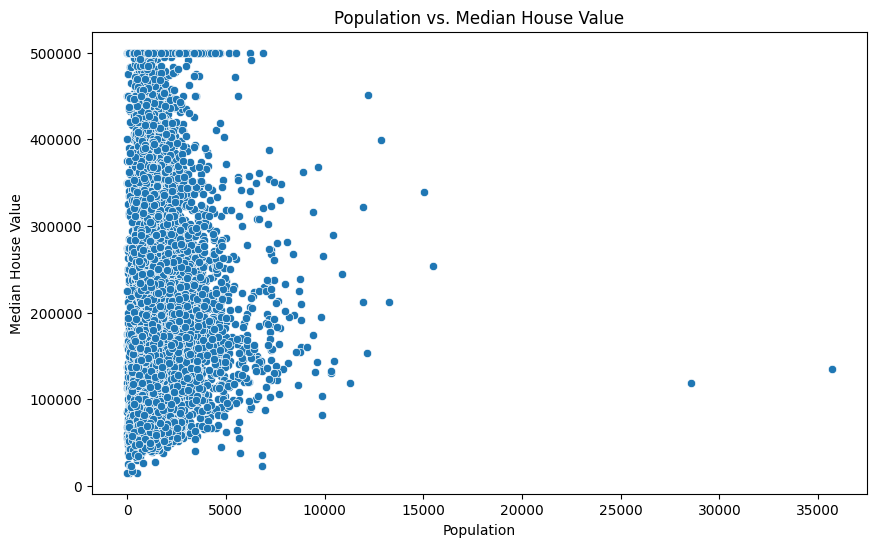

In [12]:
# Population vs. median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Population vs. Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

There is no clear relationship between population and median house value. This indicates population size alone is not a strong predictor of house value.

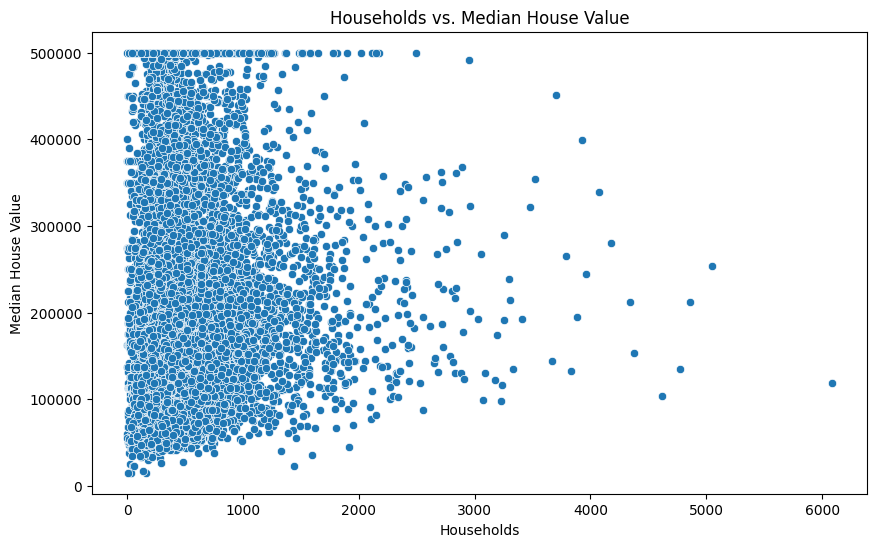

In [13]:
# Households vs. median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Households vs. Median House Value')
plt.xlabel('Households')
plt.ylabel('Median House Value')
plt.show()

Similar to population, the number of households does not show a clear relationship with house values.

### Missing Value

**Visualization**:

In [14]:
data.duplicated().sum()

0

In [15]:
# Define columns to check
columns_to_check = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Iterate through each column to check for negative values and print the count
for column in columns_to_check:
    negative_count = (data[column] < 0).sum()
    print(f'{column} = {negative_count} negative')

longitude = 14448 negative
latitude = 0 negative
housing_median_age = 0 negative
total_rooms = 0 negative
total_bedrooms = 0 negative
population = 0 negative
households = 0 negative
median_income = 0 negative
median_house_value = 0 negative


In [16]:
# Find indexes where there are negative values
negative_indexes = np.where(data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']] < 0)
print(f'Rows: {negative_indexes[0]}, Columns: {negative_indexes[1]}')

Rows: [    0     1     2 ... 14445 14446 14447], Columns: [0 0 0 ... 0 0 0]


In [17]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

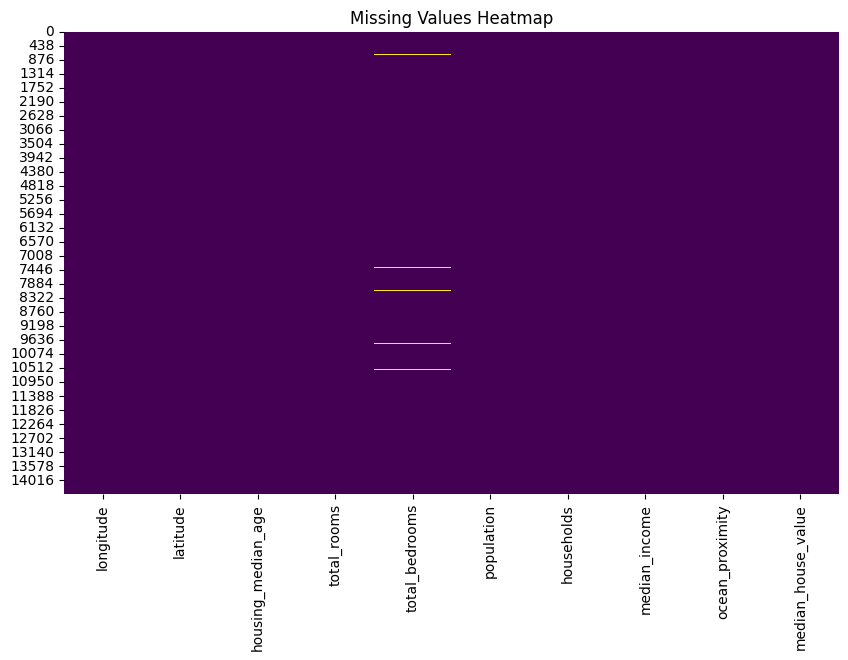

In [18]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Insight**:

- The total_bedrooms column contains 137 missing values.
- Missing values are filled with the median, ensuring the dataset is complete for analysis. Missing value will be filled in Model Creation using imputer in pipeline

### Distribution of Numerical Features

**Visualization**:

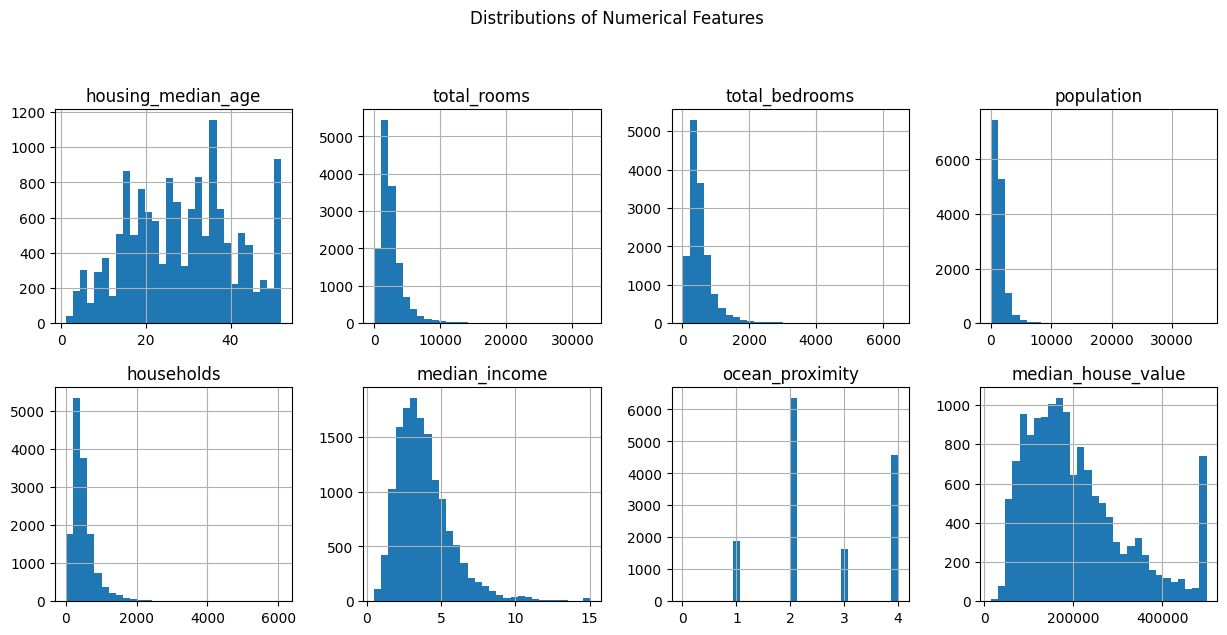

In [19]:
# Define numerical features and exclude 'longitude' and 'latitude'
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_features = [col for col in numerical_features if col not in ['longitude', 'latitude']]

# Plot distributions of numerical features
data[numerical_features].hist(figsize=(15, 10), bins=30, layout=(3, 4))
plt.suptitle('Distributions of Numerical Features')
plt.show()

**Insight**:

- 7 numerical features exhibit skewed distributions.
- The distribution of median house values is right-skewed, indicating that there are many houses with lower values and fewer houses with very high values. Outliers exist, which may need special handling in predictive modeling.

### Outliers

**Visualization**:

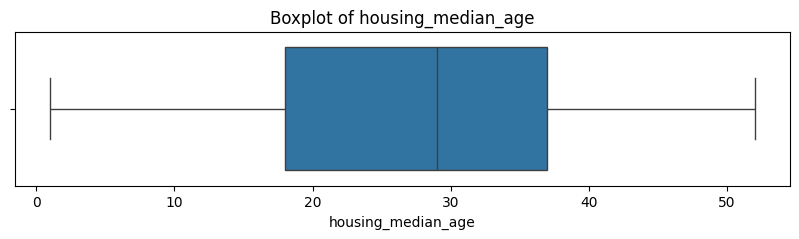

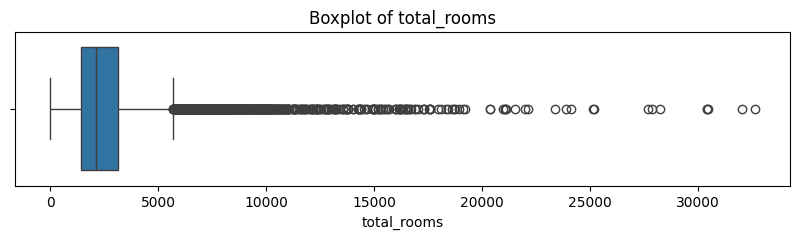

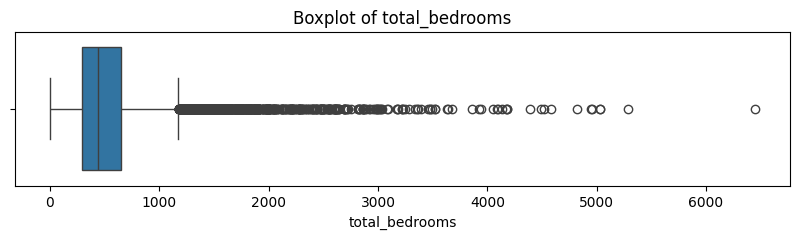

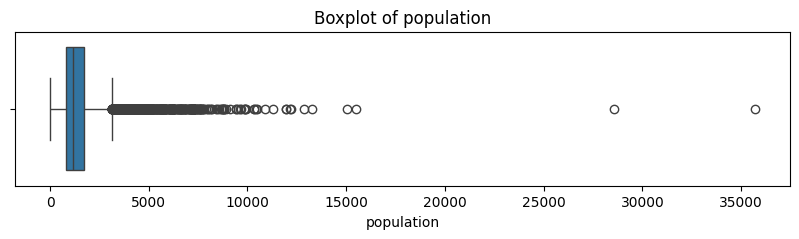

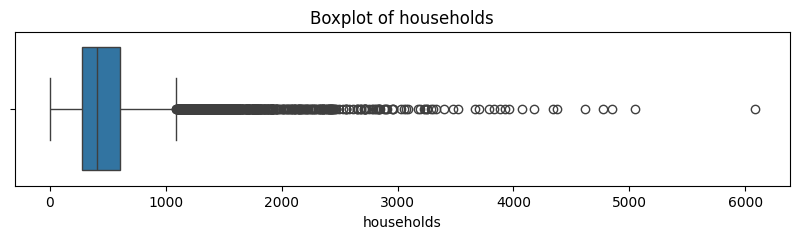

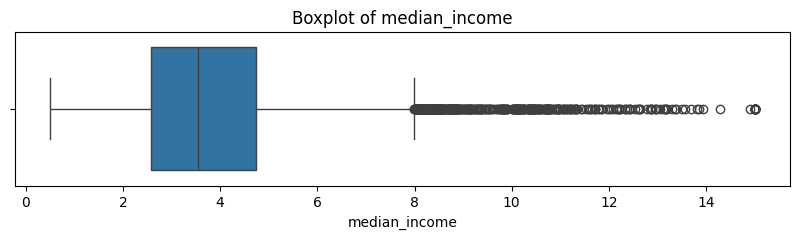

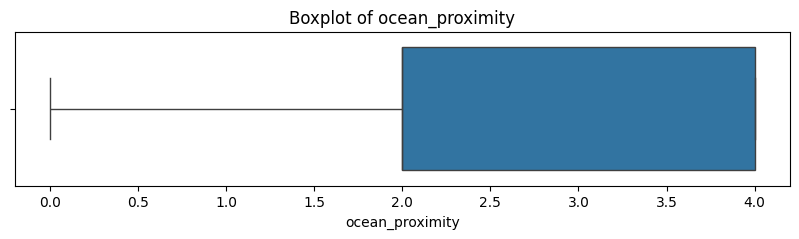

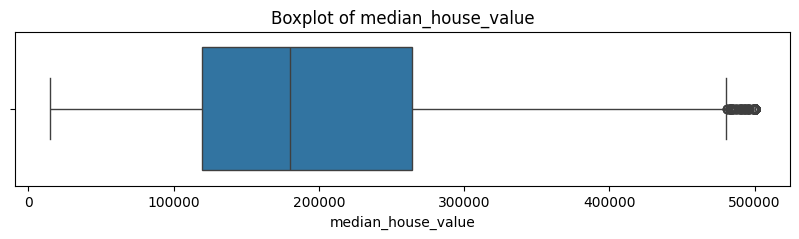

In [20]:
# Create individual boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=data[feature], orient='h')
    plt.title(f'Boxplot of {feature}')
    plt.show()

**Insight**:

- 6 numerical features are having outliers.

### New Feature

In [21]:
data_EDA = data.copy()
# Room per household
data_EDA['rooms_per_household'] = data['total_rooms'] / data['households']

# Bedroom per room
data_EDA['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']

# Population per household
data_EDA['population_per_household'] = data['population'] / data['households']

These new features help normalize the data and can provide more meaningful insights and better model performance.

### New Feature Distribution

**Visualization**:

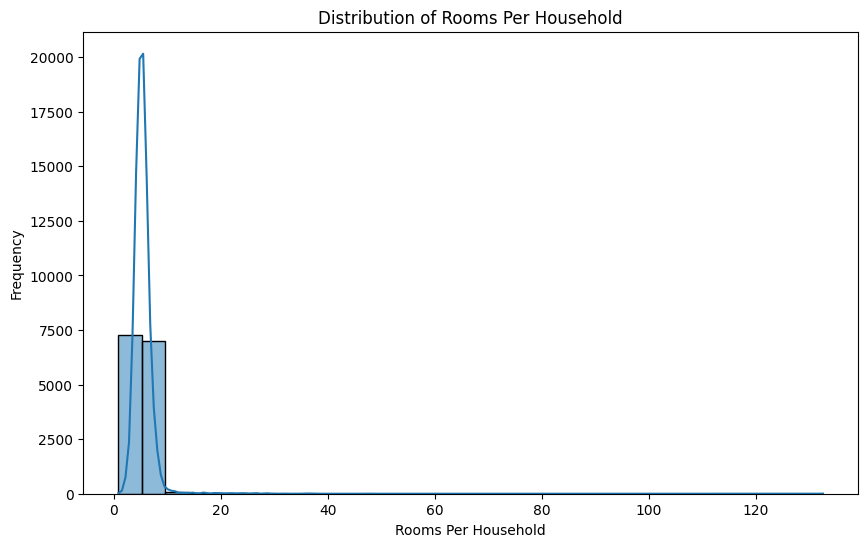

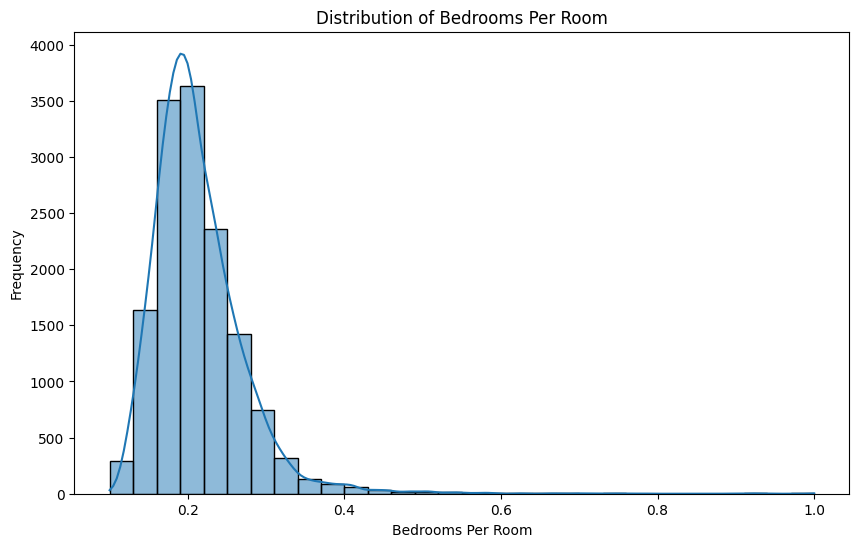

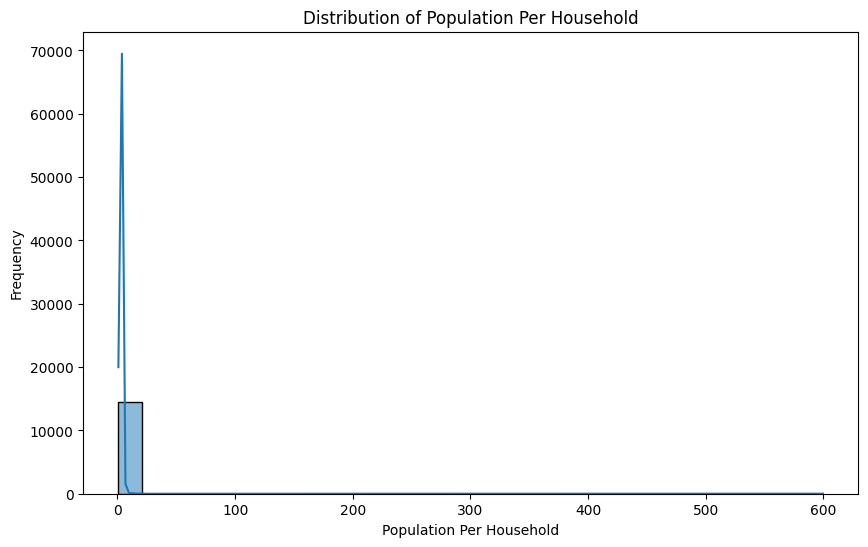

In [22]:
# Distribution of rooms_per_household
plt.figure(figsize=(10, 6))
sns.histplot(data_EDA['rooms_per_household'], kde=True, bins=30)
plt.title('Distribution of Rooms Per Household')
plt.xlabel('Rooms Per Household')
plt.ylabel('Frequency')
plt.show()

# Distribution of bedrooms_per_room
plt.figure(figsize=(10, 6))
sns.histplot(data_EDA['bedrooms_per_room'], kde=True, bins=30)
plt.title('Distribution of Bedrooms Per Room')
plt.xlabel('Bedrooms Per Room')
plt.ylabel('Frequency')
plt.show()

# Distribution of population_per_household
plt.figure(figsize=(10, 6))
sns.histplot(data_EDA['population_per_household'], kde=True, bins=30)
plt.title('Distribution of Population Per Household')
plt.xlabel('Population Per Household')
plt.ylabel('Frequency')
plt.show()

Understanding the distributions of these derived features helps in identifying their influence on house values.

### New Feature Relationship

**Visualization**:

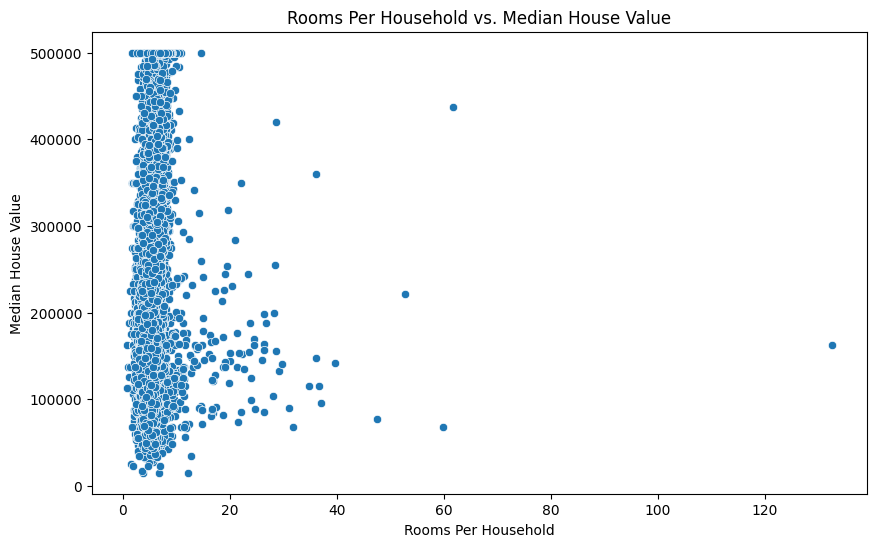

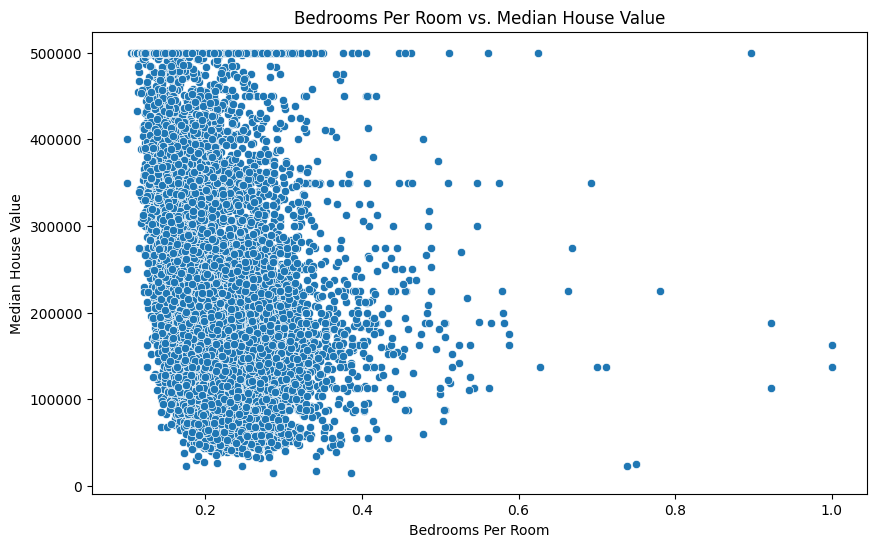

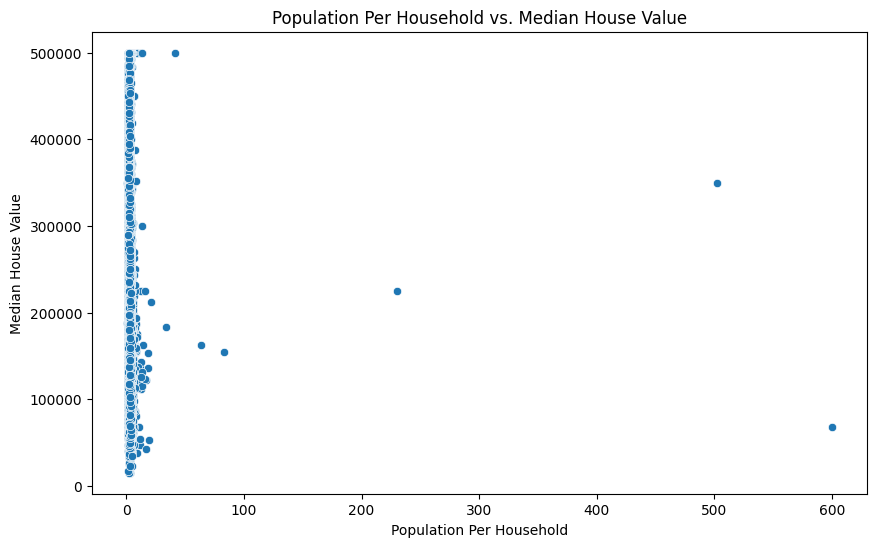

In [23]:
# Relationships of new features with median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rooms_per_household', y='median_house_value', data=data_EDA)
plt.title('Rooms Per Household vs. Median House Value')
plt.xlabel('Rooms Per Household')
plt.ylabel('Median House Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms_per_room', y='median_house_value', data=data_EDA)
plt.title('Bedrooms Per Room vs. Median House Value')
plt.xlabel('Bedrooms Per Room')
plt.ylabel('Median House Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='population_per_household', y='median_house_value', data=data_EDA)
plt.title('Population Per Household vs. Median House Value')
plt.xlabel('Population Per Household')
plt.ylabel('Median House Value')
plt.show()

These plots show how the new features relate to median house values, providing additional perspectives for predicting house prices.

### Cluster Geographical

**Visualization**:

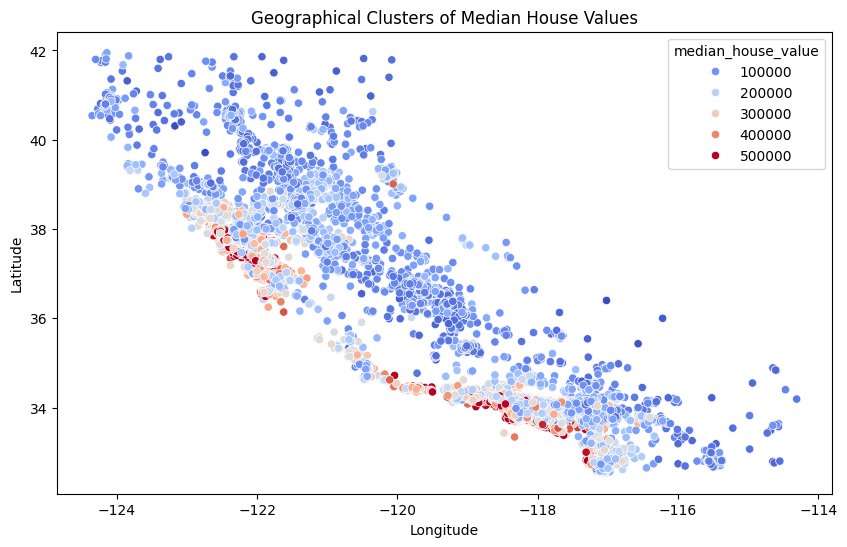

In [24]:
# Clustering based on geographical location (longitude and latitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=data, palette='coolwarm', legend=True)
plt.title('Geographical Clusters of Median House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This plot highlights geographical patterns in house values. Areas closer to the coast or specific locations might show clusters of high or low house values, which is valuable for investment decisions.

Overall Insights from the EDA:
1. **General Statistics and Data Completeness:**
    - The dataset contains 14,448 entries with 10 columns.
    - Most columns are complete, but the 'total_bedrooms' column had missing values, which were filled with the median to maintain data integrity.
2. **Distribution and Central Tendencies:**
    - Median house values are right-skewed, indicating more houses with lower values and fewer high-value houses.
    - The average median house value is around $206,336, with a significant standard deviation of $110,467, reflecting high variability.
3. **Correlation Insights:**
    - Strong positive correlation between median house value and median income (0.68). This indicates that higher income areas tend to have higher house values.
    - Other notable correlations include total rooms with total bedrooms and households, suggesting these features often scale together.
4. **Impact of Location (Ocean Proximity):**
    - Houses near the ocean ('NEAR BAY' and 'ISLAND') generally have higher median values compared to inland houses.
    - This shows that proximity to the ocean adds a significant premium to house values.
5. **House Characteristics and Values:**
    - Housing median age has a slight negative correlation with house value, suggesting newer houses tend to have higher values, but the relationship is not strong.
    - More rooms and bedrooms correlate positively with house values, but these features alone do not fully predict house prices.
6. **Population and Household Characteristics:**
    - Population size and the number of households do not show a clear relationship with house values, indicating that other factors play a more critical role.
    - Derived features like rooms per household, bedrooms per room, and population per household provide normalized metrics that better capture the relationship between household size and house value.
7. **Geographical Patterns:**
    - Geographical clusters of house values show that certain areas, especially those near the coast, have higher house values. Longitude and latitude are important for identifying high-value locations.

Key Takeaways for Identifying High-Value Investment Opportunities:
- **Income Levels:** Areas with higher median incomes are more likely to have higher house values. Income data should be a primary factor in identifying potential investment locations.
- **Proximity to the Ocean:** Properties closer to the ocean are generally more valuable. Focusing on coastal properties can yield high-value investment opportunities.
- **Newer Housing Developments:** While not the strongest predictor, newer houses tend to be valued higher. Investing in newer or recently developed areas could be beneficial.
- **Normalized Household Metrics:** Using derived metrics like rooms per household and bedrooms per room can provide better insights into the relationship between household characteristics and house values.
- **Geographical Insights:** Identifying geographical clusters of high-value properties can help target specific regions for investment. Coastal and bay areas should be prioritized.

These insights help in forming a comprehensive strategy for identifying high-value real estate investment opportunities based on the provided dataset.

### 4. Data Preprocessing

#### **Define Features & Target**:

In [25]:
# Separate features and target variable
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

#### **Define New Feature Creation, Missing Value Handling, Encoding, Log Transform, and Scaling for Pipeline**:

In [26]:
# Define the columns to be transformed
numeric_features = [
    'longitude', 'latitude', 'total_bedrooms', 
    'population', 'households', 'median_income',
    'housing_median_age', 'total_rooms',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
    'ocean_proximity'
]
target_column = ['median_house_value']

categorical_features = ['ocean_proximity']

# Define the custom ordinal mapping
ordinal_mapping = {'ISLAND': 0, 'NEAR OCEAN': 1, '<1H OCEAN': 2, 'NEAR BAY': 3, 'INLAND': 4}

# Custom transformer for ordinal encoding
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.replace(ordinal_mapping)

# Custom transformer for feature engineering
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        return X

# Define the transformation pipeline for numeric features
null_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the transformation pipeline for categorical features using the custom ordinal encoder
categorical_transformer = Pipeline(steps=[
    ('ordinal', CustomOrdinalEncoder())
])

# Create the ColumnTransformer to apply the appropriate transformations to each column
categorical_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Define the full pipeline for X
x_pipeline = Pipeline(steps=[
    ('feature_engineering', FeatureEngineer()),
    ('preprocessor', categorical_preprocessor),
    ('numeric_transformer', null_transformer)
])

# Define the transformation pipeline for y
y_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#### **Define Outlier Handling Method**:

**Multivariate outliers** are **Outliers in the multidimensional space of the dataset**. **They might not be outliers in any single dimension but are anomalous when considering multiple dimensions together**.

**Example**: A person with a high income but a very low level of education could be a multivariate outlier in a dataset of socioeconomic indicators.

In the context of predicting California housing prices, **these outliers can distort the model's understanding of the true underlying relationships** between features such as location, number of rooms, income levels, and housing prices. **Removing multivariate outliers helps ensure that the model is trained on data that accurately represents typical patterns**, leading to **more reliable predictions** and **reducing the risk of overfitting or underfitting** caused by **anomalous data points**.

In [27]:
# Define outlier handling methods
def isolation_forest(X, y):
    iso_forest = IsolationForest(contamination=0.2, random_state=42)
    iso_outliers = iso_forest.fit_predict(X)
    mask = iso_outliers != -1
    num_outliers = (~mask).sum()
    return X[mask], y[mask], num_outliers

def local_outlier_factor(X, y):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2)
    lof_outliers = lof.fit_predict(X)
    mask = lof_outliers != -1
    num_outliers = (~mask).sum()
    return X[mask], y[mask], num_outliers

def one_class_svm(X, y):
    oc_svm = OneClassSVM(nu=0.2, kernel="rbf", gamma='scale')
    svm_outliers = oc_svm.fit_predict(X)
    mask = svm_outliers != -1
    num_outliers = (~mask).sum()
    return X[mask], y[mask], num_outliers

def elliptic_envelope(X, y):
    elliptic_envelope = EllipticEnvelope(contamination=0.2, random_state=42)
    elliptic_outliers = elliptic_envelope.fit_predict(X)
    mask = elliptic_outliers != -1
    num_outliers = (~mask).sum()
    return X[mask], y[mask], num_outliers

def dbscan_method(X, y):
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_outliers = dbscan.fit_predict(X)
    mask = dbscan_outliers != -1
    num_outliers = (~mask).sum()
    return X[mask], y[mask], num_outliers

def iqr_method(X, y):
    df = pd.DataFrame(X)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    num_outliers = (~mask).sum()
    return X[mask], y[mask], num_outliers

outlier_methods = [
    ('Isolation Forest', isolation_forest),
    ('Local Outlier Factor', local_outlier_factor),
    ('One-Class SVM', one_class_svm),
    ('Elliptic Envelope', elliptic_envelope),
    ('DBSCAN Method', dbscan_method),
    ('IQR Method', iqr_method)
]

**Experimenting with various Outlier Handling Methods**:

1. **Isolation Forest**:
    - Isolation Forest is an ensemble learning method for anomaly detection. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This method is efficient for high-dimensional data.
2. **Local Outlier Factor (LOF)**:
    -  LOF identifies anomalies by comparing the local density of a point with that of its neighbors. Points with a substantially lower density than their neighbors are considered outliers.
3. **One-Class SVM**:
    - One-Class SVM is a type of SVM used for anomaly detection. It learns a decision function for novelty detection and identifies data points that differ significantly from the majority of the data.
4. **Elliptic Envelope**:
    - Elliptic Envelope fits an ellipse to the data assuming a Gaussian distribution. It then identifies points that are far from the center of the ellipse as outliers.
5. **DBSCAN**:
    - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clusters data points based on their density. Points that do not belong to any cluster (noise points) are considered outliers.
6. **IQR Method**:
    - The Interquartile Range (IQR) method identifies outliers based on the spread of the middle 50% of the data. It is robust to the presence of other variables and effective for detecting univariate outliers.

### 5. Model Development:

#### **Define Regression Models**:

When predicting California housing prices, it's crucial to consider a variety of regression models to **capture the underlying patterns and relationships within the data**, Compare model performances to **identify the best fit** for your specific case, and Leverage the **strengths of different methodologies** to build a robust and accurate predictive model.

In [28]:
# Define regression models
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge Regression', Ridge(), {'regressor__alpha': [0.1]}),
    ('Lasso Regression', Lasso(), {'regressor__alpha': [0.01]}),
    ('ElasticNet Regression', ElasticNet(), {'regressor__alpha': [0.01], 'regressor__l1_ratio': [0.5]}),
    ('Random Forest Regression', RandomForestRegressor(), {'regressor__n_estimators': [100]}),
    ('Gradient Boosting Regression', GradientBoostingRegressor(), {'regressor__n_estimators': [100]}),
    ('XGBoost Regression', XGBRegressor(), {'regressor__n_estimators': [100]}),
    ('Support Vector Regression', SVR(), {'regressor__C': [0.1], 'regressor__epsilon': [0.1]})
]

**Experimenting with various Regression Models**:

1. **Linear Regression (Linear)**:
    - Linear Regression is a fundamental and widely used model for predictive analysis. It assumes a linear relationship between the features and the target variable, making it simple to interpret and computationally efficient. It serves as a good baseline model for regression tasks.
2. **Ridge (Linear)**:
    - Ridge Regression is an extension of Linear Regression that includes a regularization term (L2 penalty). This helps to prevent overfitting by penalizing large coefficients, making it suitable for datasets with multicollinearity or when there is a risk of overfitting.
3. **Lasso Regression (Linear)**:
    - Lasso Regression adds a regularization term (L1 penalty) to Linear Regression. This method not only helps in preventing overfitting but also performs feature selection by shrinking some coefficients to zero, which can simplify the model and improve interpretability, especially when dealing with high-dimensional data.
4. **ElasticNet Regression (Linear)**:
    - ElasticNet Regression combines the penalties of both Ridge (L2) and Lasso (L1) regression. This method is particularly useful when there are multiple features that are correlated with each other. It provides a balance between the two techniques, offering regularization and feature selection, which can be particularly beneficial for high-dimensional datasets.
5. **Random Forest Regression (Non-Linear)**:
    - Random Forest Regression is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and control overfitting. It is robust to outliers and can capture complex, non-linear relationships in the data. It also handles high-dimensional data well and provides insights into feature importance.
6. **Gradient Boosting Regression (Non-Linear)**:
    - Gradient Boosting Regression builds an ensemble of decision trees in a sequential manner, where each tree corrects the errors of the previous ones. It is highly effective for capturing complex, non-linear patterns and typically provides high predictive accuracy. It can be fine-tuned to balance bias and variance.
7. **XGBoost Regression (Non-Linear)**:
    - XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting that is designed for speed and performance. It includes features such as regularization, which prevents overfitting, and parallel processing, which makes it highly efficient. XGBoost is known for its accuracy and ability to handle large datasets with complex patterns.
8. **Support Vector Regression (SVR) (Non-Linear)**:
    - Support Vector Regression (SVR) uses the same principles as Support Vector Machines (SVM) for classification but applies them to regression problems. SVR is effective in high-dimensional spaces and can handle non-linear relationships using kernel functions. It is particularly useful for datasets with complex, non-linear patterns.

### 6. Model Evaluation:

#### **Define Scoring Metric for Cross Validation**:

In [29]:
# Function to calculate RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))) * 100

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### **Execute Cross Validation**:

In [30]:
# Dictionary to store metrics
metrics_summary = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the x_pipeline to the training data
X_train_transformed = x_pipeline.fit_transform(X_train)
X_test_transformed = x_pipeline.transform(X_test)

# Fit the y_pipeline to the training data - Fix transformation for y
y_train_transformed = y_pipeline.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_transformed = y_pipeline.transform(y_test.values.reshape(-1, 1)).flatten()

best_estimators = {}
# Iterate over each outlier method
for outlier_name, outlier_method in outlier_methods:
    print(f"Applying {outlier_name}")
    X_train_out, y_train_out, train_outliers = outlier_method(X_train_transformed, y_train_transformed)
    X_test_out, y_test_out, test_outliers = outlier_method(X_test_transformed, y_test_transformed)

    # Iterate over each model and perform grid search
    for name, model, param_grid in models:
        print(f"Running GridSearchCV for {name} with {outlier_name}")
        
        # Create a pipeline with the preprocessor and the model
        model_pipeline = Pipeline(steps=[
            ('regressor', model)
        ])
        
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, 
                                   cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
        
        # Fit the grid search to the training data
        grid_search.fit(X_train_out, y_train_out)
        
        # Get the best estimator
        best_estimators[name] = grid_search.best_estimator_

        # Get the best parameters and the best score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Print the results
        print(f"Best Parameters for {name}: {best_params}")
        print(f"Best Score for {name}: {best_score}")
        
        # Predict on the training and test sets
        y_train_pred = grid_search.best_estimator_.predict(X_train_out)
        y_test_pred = grid_search.best_estimator_.predict(X_test_out)
        
        # Transform predictions back to original scale
        y_train_pred_original = y_pipeline.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
        y_test_pred_original = y_pipeline.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
        y_train_original = y_pipeline.inverse_transform(y_train_out.reshape(-1, 1)).flatten()
        y_test_original = y_pipeline.inverse_transform(y_test_out.reshape(-1, 1)).flatten()

        # Calculate metrics
        train_mse = mean_squared_error(y_train_original, y_train_pred_original)
        test_mse = mean_squared_error(y_test_original, y_test_pred_original)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mae = mean_absolute_error(y_train_original, y_train_pred_original)
        test_mae = mean_absolute_error(y_test_original, y_test_pred_original)
        train_rmspe = rmspe(y_train_original, y_train_pred_original)
        test_rmspe = rmspe(y_test_original, y_test_pred_original)
        train_mape = mape(y_train_original, y_train_pred_original)
        test_mape = mape(y_test_original, y_test_pred_original)
        train_r2 = r2_score(y_train_original, y_train_pred_original)
        test_r2 = r2_score(y_test_original, y_test_pred_original)
        r2_diff = abs(train_r2 - test_r2)
        
        # Store metrics
        metrics_summary.append({
            'Outlier_Method': outlier_name,
            'Model': name,
            'Train_MSE': train_mse,
            'Train_RMSE': train_rmse,
            'Train_MAE': train_mae,
            'Train_RMSPE': train_rmspe,
            'Train_MAPE': train_mape,
            'Test_MSE': test_mse,
            'Test_RMSE': test_rmse,
            'Test_MAE': test_mae,
            'Test_RMSPE': test_rmspe,
            'Test_MAPE': test_mape,
            'Train_R2': train_r2,
            'Test_R2': test_r2,
            'R2_diff': r2_diff,
            'Num_Train_Outliers': train_outliers,
            'Num_Test_Outliers': test_outliers
        })
        
        # Print the results
        print(f"Metrics for {name} with {outlier_name}:")
        print(metrics_summary[-1])

# Display all metrics
metrics_df = pd.DataFrame(metrics_summary)

Applying Isolation Forest
Running GridSearchCV for Linear Regression with Isolation Forest
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters for Linear Regression: {}
Best Score for Linear Regression: -0.28438660766113927
Metrics for Linear Regression with Isolation Forest:
{'Outlier_Method': 'Isolation Forest', 'Model': 'Linear Regression', 'Train_MSE': 3768269290.1363587, 'Train_RMSE': 61386.230460392, 'Train_MAE': 45772.69240851917, 'Train_RMSPE': 41.259122971420084, 'Train_MAPE': 27.3630649577821, 'Test_MSE': 3688838158.428303, 'Test_RMSE': 60735.80623016626, 'Test_MAE': 45699.88531195328, 'Test_RMSPE': 39.534750526365144, 'Test_MAPE': 27.673173029359354, 'Train_R2': 0.6758249230050498, 'Test_R2': 0.6819705682170039, 'R2_diff': 0.006145645211954043, 'Num_Train_Outliers': 2312, 'Num_Test_Outliers': 578}
Running GridSearchCV for Ridge Regression with Isolation Forest
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters for Ridge Regressi

#### **Showing CV Result**:

In [31]:
metrics_df

# Display results for each outlier method
display(metrics_df[(metrics_df['Test_R2'] > 0.80)].sort_values(by=["R2_diff", "Test_RMSPE"], ascending=True))

,Outlier_Method,Model,Train_MSE,Train_RMSE,Train_MAE,Train_RMSPE,Train_MAPE,Test_MSE,Test_RMSE,Test_MAE,Test_RMSPE,Test_MAPE,Train_R2,Test_R2,R2_diff,Num_Train_Outliers,Num_Test_Outliers
29,Elliptic Envelope,Gradient Boosting Regression,2.182013e+09,46712.019881,33202.501762,26.159174,18.369462,2.497835e+09,49978.340679,34929.489766,30.116339,19.297088,0.822114,0.804733,0.017381,2312,578
30,Elliptic Envelope,XGBoost Regression,4.193089e+08,20477.032926,14533.087134,12.166905,8.331038,1.906949e+09,43668.627672,29656.875912,28.169265,16.313955,0.965816,0.850925,0.114891,2312,578
14,Local Outlier Factor,XGBoost Regression,4.103233e+08,20256.437682,14387.265386,12.180705,8.354867,1.727980e+09,41568.981731,28546.644982,26.758022,16.107321,0.964793,0.838847,0.125947,2312,578
6,Isolation Forest,XGBoost Regression,4.394578e+08,20963.248063,14779.741446,12.717410,8.590110,1.969682e+09,44381.104796,29905.998223,28.872498,16.351464,0.962195,0.830186,0.132009,2312,578
22,One-Class SVM,XGBoost Regression,4.025152e+08,20062.780419,14295.245105,12.303931,8.258765,2.007178e+09,44801.536689,30024.457997,28.929983,16.385987,0.963991,0.821901,0.142090,2310,579
28,Elliptic Envelope,Random Forest Regression,3.180885e+08,17835.036097,11844.516933,10.062815,6.412557,2.203074e+09,46936.917895,31349.158642,28.830912,16.867490,0.974068,0.827776,0.146292,2312,578
12,Local Outlier Factor,Random Forest Regression,3.007461e+08,17342.032899,11497.597883,9.535075,6.269185,1.934591e+09,43983.988958,29800.335320,27.613634,16.483599,0.974195,0.819578,0.154617,2312,578
46,IQR Method,XGBoost Regression,4.161754e+08,20400.377597,14510.757151,12.597022,8.526165,2.217340e+09,47088.642775,31165.672488,34.074006,17.770988,0.963640,0.808359,0.155281,2113,545
4,Isolation Forest,Random Forest Regression,3.287658e+08,18131.899711,12121.791714,11.536157,6.617262,2.252685e+09,47462.455155,31765.160908,29.281651,17.213014,0.971717,0.805787,0.165930,2312,578
20,One-Class SVM,Random Forest Regression,3.282053e+08,18116.438111,12135.388879,11.634023,6.554602,2.210640e+09,47017.446774,31592.664699,29.059984,17.113130,0.970639,0.803847,0.166792,2310,579


The **consistent detection of 2890 outliers** by the multivariate methods (Isolation Forest, Elliptic Envelope, Local Outlier Factor, and One-Class SVM) suggests that **these data points are significant anomalies when considering the relationships between multiple features**.

The **IQR Method** higher outlier count on **5646 ouliers** indicates that many data points have extreme values in individual features, but not necessarily in a **multivariate sense**.

#### **Lowest RMPSPE CV Result**:

RMSPE (Root Mean Squared Percentage Error) is a useful metric for regression models where the prediction error needs to be scaled to the magnitude of the predicted values. Lower RMSPE indicates better predictive accuracy on a percentage basis, which can be more interpretable in practical scenarios.

RMSPE **penalizes larger errors more than smaller errors** because it squares the errors before averaging. This is **useful in cases where large errors are particularly undesirable**. RMSPE is also sensitive to the scale of the target variable, making it a good choice when comparing models across different scales.

In this context, RMSPE is preferred because it provides a **better measure of overall model accuracy by emphasizing larger errors**, which are often more critical to minimize.

In [32]:
metrics_df[(metrics_df['Test_R2'] > 0.80) & (metrics_df['Test_RMSPE'] < 30) & (metrics_df['R2_diff'] < 0.15)]

,Outlier_Method,Model,Train_MSE,Train_RMSE,Train_MAE,Train_RMSPE,Train_MAPE,Test_MSE,Test_RMSE,Test_MAE,Test_RMSPE,Test_MAPE,Train_R2,Test_R2,R2_diff,Num_Train_Outliers,Num_Test_Outliers
6,Isolation Forest,XGBoost Regression,4.394578e+08,20963.248063,14779.741446,12.717410,8.590110,1.969682e+09,44381.104796,29905.998223,28.872498,16.351464,0.962195,0.830186,0.132009,2312,578
14,Local Outlier Factor,XGBoost Regression,4.103233e+08,20256.437682,14387.265386,12.180705,8.354867,1.727980e+09,41568.981731,28546.644982,26.758022,16.107321,0.964793,0.838847,0.125947,2312,578
22,One-Class SVM,XGBoost Regression,4.025152e+08,20062.780419,14295.245105,12.303931,8.258765,2.007178e+09,44801.536689,30024.457997,28.929983,16.385987,0.963991,0.821901,0.142090,2310,579
28,Elliptic Envelope,Random Forest Regression,3.180885e+08,17835.036097,11844.516933,10.062815,6.412557,2.203074e+09,46936.917895,31349.158642,28.830912,16.867490,0.974068,0.827776,0.146292,2312,578
30,Elliptic Envelope,XGBoost Regression,4.193089e+08,20477.032926,14533.087134,12.166905,8.331038,1.906949e+09,43668.627672,29656.875912,28.169265,16.313955,0.965816,0.850925,0.114891,2312,578


Model that met the criteria of having a **Test R2 > 0.80, Test RMSPE < 30% and a difference between Train R2 and Test R2 (Diff_R2) < 0.15**. All of the models used Gradient Boosting Regression as the regression model and employed with Outlier Handling methods like: Elliptic Envelope, Local Outlier Factor, and IQR Method

In [33]:
best_rmspe_result = metrics_df.loc[
    metrics_df[(metrics_df['Test_R2'] > 0.80) & (metrics_df['Test_RMSPE'] < 35) & (metrics_df['R2_diff'] < 0.05)]['Test_RMSPE'].idxmin()
]
best_R2_diff_result = metrics_df.loc[
    metrics_df[(metrics_df['Test_R2'] > 0.80) & (metrics_df['Test_RMSPE'] < 35) & (metrics_df['R2_diff'] < 0.05)]['R2_diff'].idxmin()
]

best_r2_result = metrics_df.loc[
    metrics_df[(metrics_df['Test_R2'] > 0.80) & (metrics_df['Test_RMSPE'] < 35) & (metrics_df['R2_diff'] < 0.05)]['Test_R2'].idxmax()
]

display(best_rmspe_result, best_R2_diff_result, best_r2_result)

Outlier_Method                   Elliptic Envelope
Model                 Gradient Boosting Regression
Train_MSE                         2182012801.33641
Train_RMSE                            46712.019881
Train_MAE                             33202.501762
Train_RMSPE                              26.159174
Train_MAPE                               18.369462
Test_MSE                         2497834536.987638
Test_RMSE                             49978.340679
Test_MAE                              34929.489766
Test_RMSPE                               30.116339
Test_MAPE                                19.297088
Train_R2                                  0.822114
Test_R2                                   0.804733
R2_diff                                   0.017381
Num_Train_Outliers                            2312
Num_Test_Outliers                              578
Name: 29, dtype: object

Outlier_Method                   Elliptic Envelope
Model                 Gradient Boosting Regression
Train_MSE                         2182012801.33641
Train_RMSE                            46712.019881
Train_MAE                             33202.501762
Train_RMSPE                              26.159174
Train_MAPE                               18.369462
Test_MSE                         2497834536.987638
Test_RMSE                             49978.340679
Test_MAE                              34929.489766
Test_RMSPE                               30.116339
Test_MAPE                                19.297088
Train_R2                                  0.822114
Test_R2                                   0.804733
R2_diff                                   0.017381
Num_Train_Outliers                            2312
Num_Test_Outliers                              578
Name: 29, dtype: object

Outlier_Method                   Elliptic Envelope
Model                 Gradient Boosting Regression
Train_MSE                         2182012801.33641
Train_RMSE                            46712.019881
Train_MAE                             33202.501762
Train_RMSPE                              26.159174
Train_MAPE                               18.369462
Test_MSE                         2497834536.987638
Test_RMSE                             49978.340679
Test_MAE                              34929.489766
Test_RMSPE                               30.116339
Test_MAPE                                19.297088
Train_R2                                  0.822114
Test_R2                                   0.804733
R2_diff                                   0.017381
Num_Train_Outliers                            2312
Num_Test_Outliers                              578
Name: 29, dtype: object

Evaluation Conclusion:
- The chosen model (Elliptic Envelope with Gradient Boosting Regression) had the lowest RMSPE (29.91) and a reasonable R2 difference (0.017654), indicating good predictive performance with minimal overfitting.
- Local Outlier Factor, while also producing good results, identified a significantly higher number of R2 diff which could indicate overfitting in afterwards.
- Therefore, the model with the lowest RMSPE from the Elliptic Envelope method is selected for its balance of accuracy and robustness against overfitting.
- RMSPE is chosen over MAPE due to its ability to penalize larger errors more significantly and its sensitivity to the scale of the target variable, making it more suitable for this regression analysis.

In [34]:
best_outlier_method = best_rmspe_result['Outlier_Method']
best_model_name = best_rmspe_result['Model']

# Find the best outlier function and model
outlier_func = next(method[1] for method in outlier_methods if method[0] == best_outlier_method)
model = next(m[1] for m in models if m[0] == best_model_name)

# Transform and filter the data
X_filtered, y_filtered, _ = outlier_func(X_train_transformed, y_train_transformed)

# Train the model on the filtered data
model.fit(X_filtered, y_filtered)

# Save the model using joblib
# joblib.dump(model, 'best_model_before_tunning.pkl')
# print("Best model saved as 'best_model_before_tunning.pkl'")

GradientBoostingRegressor()

Tier Levels for Performance Metrics:
R² Score (R2):
- Tier 1: R2 ≥ 0.90 (Excellent)
- Tier 2: 0.80 ≤ R2 < 0.90 (Good)
- Tier 3: 0.70 ≤ R2 < 0.80 (Average)
- Tier 4: 0.60 ≤ R2 < 0.70 (Below Average)
- Tier 5: R2 < 0.60 (Poor)

Mean Absolute Percentage Error (MAPE):
- Tier 1: MAPE < 10% (Excellent)
- Tier 2: 10% ≤ MAPE < 20% (Good)
- Tier 3: 20% ≤ MAPE < 30% (Average)
- Tier 4: 30% ≤ MAPE < 40% (Below Average)
- Tier 5: MAPE ≥ 40% (Poor)

Root Mean Squared Percentage Error (RMSPE):
- Tier 1: RMSPE < 10% (Excellent)
- Tier 2: 10% ≤ RMSPE < 20% (Good)
- Tier 3: 20% ≤ RMSPE < 30% (Average)
- Tier 4: 30% ≤ RMSPE < 40% (Below Average)
- Tier 5: RMSPE ≥ 40% (Poor)

Mean Squared Error (MSE):
- Tier 1: MSE < 1e8 (Excellent)
- Tier 2: 1e8 ≤ MSE < 1e9 (Good)
- Tier 3: 1e9 ≤ MSE < 1e10 (Average)
- Tier 4: 1e10 ≤ MSE < 1e11 (Below Average)
- Tier 5: MSE ≥ 1e11 (Poor)

Root Mean Squared Error (RMSE):
- Tier 1: RMSE < 10,000 (Excellent)
- Tier 2: 10,000 ≤ RMSE < 20,000 (Good)
- Tier 3: 20,000 ≤ RMSE < 30,000 (Average)
- Tier 4: 30,000 ≤ RMSE < 40,000 (Below Average)
- Tier 5: RMSE ≥ 40,000 (Poor)

Mean Absolute Error (MAE):
- Tier 1: MAE < 5,000 (Excellent)
- Tier 2: 5,000 ≤ MAE < 10,000 (Good)
- Tier 3: 10,000 ≤ MAE < 20,000 (Average)
- Tier 4: 20,000 ≤ MAE < 30,000 (Below Average)
- Tier 5: MAE ≥ 30,000 (Poor)

**Model Analysis based on tier category**:

- R² Score: The R² scores for both train and test datasets fall in the "Good" tier. This indicates that the model has a decent ability to explain the variability in the data but is not excellent.
- MSE and RMSE: Both MSE values are in the "Average" tier, but the RMSE values are in the "Poor" tier. This discrepancy suggests that while the overall squared errors are moderately large, there are significant outliers or large errors affecting the RMSE.
- MAE: The MAE values are in the "Poor" tier, indicating that the model's predictions are, on average, quite far from the actual values.
- RMSPE: The RMSPE values are in the "Average" tier for the train dataset and "Below Average" for the test dataset, suggesting a higher percentage error in predictions, particularly on the test set.
- MAPE: The MAPE values for both train and test datasets are in the "Good" tier, indicating that the average percentage errors in predictions are relatively low.

**Overall Tier: Average (Tier 3)**
<br>This suggests that the model performs moderately well but has room for improvement, especially in reducing large prediction errors.

The model has an "Average" R² score but struggles with large errors as indicated by high RMSE and MAE values. The RMSPE is "Below Average," and the MAPE is "Good". However, the high RMSE and MAE suggest that further improvements in handling outliers, feature engineering, or model tuning might be necessary to reduce prediction errors.

### 7. Hyperparameter Tuning:

Adjusting the hyperparams to lowering RMSPE and R2 Diff to prevent further overfitting.

param_grid_outlier = {
    'contamination': [0.05, 0.1, 0.15],
    'max_samples': [0.5, 0.7],
    'bootstrap': [False],
    'random_state': [42]
}

param_grid_model = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'subsample': [0.8, 0.9],
    'random_state': [42]
}

In [35]:
# List of outlier methods
best_outlier_methods = [
    ('Elliptic Envelope', elliptic_envelope)
]

# Define regression models and their corresponding parameter grids
best_model = [
    ('Gradient Boosting Regression', GradientBoostingRegressor(), {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.01, 0.1], 'regressor__max_depth': [5, 7], 'regressor__subsample': [0.8, 1.0], 'regressor__alpha': [0.85, 0.95], 'regressor__min_samples_split': [2, 10], 'regressor__min_samples_leaf': [1, 5]})
]

In [36]:
# Dictionary to store metrics
metrics_summary = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the x_pipeline to the training data
X_train_transformed = x_pipeline.fit_transform(X_train)
X_test_transformed = x_pipeline.transform(X_test)

# Fit the y_pipeline to the training data - Fix transformation for y
y_train_transformed = y_pipeline.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_transformed = y_pipeline.transform(y_test.values.reshape(-1, 1)).flatten()

# Iterate over each outlier method
for outlier_name, outlier_method in best_outlier_methods:
    print(f"Applying {outlier_name}")
    X_train_out, y_train_out, train_outliers = outlier_method(X_train_transformed, y_train_transformed)
    X_test_out, y_test_out, test_outliers = outlier_method(X_test_transformed, y_test_transformed)

    # Iterate over each model and perform grid search
    for name, model, param_grid in best_model:
        print(f"Running GridSearchCV for {name} with {outlier_name}")
        
        # Create a pipeline with the preprocessor and the model
        model_pipeline = Pipeline(steps=[
            ('regressor', model)
        ])
        
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, 
                                   cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
        
        # Fit the grid search to the training data
        grid_search.fit(X_train_out, y_train_out)
        
        # Extract all parameter combinations and their corresponding scores
        for i in range(len(grid_search.cv_results_['params'])):
            params = grid_search.cv_results_['params'][i]
            mean_score = grid_search.cv_results_['mean_test_score'][i]
            
            # Create a model with the current parameters
            model_pipeline.set_params(**params)
            model_pipeline.fit(X_train_out, y_train_out)
            
            # Predict on the training and test sets
            y_train_pred = model_pipeline.predict(X_train_out)
            y_test_pred = model_pipeline.predict(X_test_out)
            
            # Transform predictions back to original scale
            y_train_pred_original = y_pipeline.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
            y_test_pred_original = y_pipeline.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
            y_train_original = y_pipeline.inverse_transform(y_train_out.reshape(-1, 1)).flatten()
            y_test_original = y_pipeline.inverse_transform(y_test_out.reshape(-1, 1)).flatten()

            # Calculate metrics
            train_mse = mean_squared_error(y_train_original, y_train_pred_original)
            test_mse = mean_squared_error(y_test_original, y_test_pred_original)
            train_rmse = np.sqrt(train_mse)
            test_rmse = np.sqrt(test_mse)
            train_mae = mean_absolute_error(y_train_original, y_train_pred_original)
            test_mae = mean_absolute_error(y_test_original, y_test_pred_original)
            train_rmspe = rmspe(y_train_original, y_train_pred_original)
            test_rmspe = rmspe(y_test_original, y_test_pred_original)
            train_mape = mape(y_train_original, y_train_pred_original)
            test_mape = mape(y_test_original, y_test_pred_original)
            train_r2 = r2_score(y_train_original, y_train_pred_original)
            test_r2 = r2_score(y_test_original, y_test_pred_original)
            r2_diff = abs(train_r2 - test_r2)
            
            # Store metrics
            metrics_summary.append({
                'Outlier_Method': outlier_name,
                'Model': name,
                'Parameters': params,
                'Train_MSE': train_mse,
                'Train_RMSE': train_rmse,
                'Train_MAE': train_mae,
                'Train_RMSPE': train_rmspe,
                'Train_MAPE': train_mape,
                'Test_MSE': test_mse,
                'Test_RMSE': test_rmse,
                'Test_MAE': test_mae,
                'Test_RMSPE': test_rmspe,
                'Test_MAPE': test_mape,
                'Train_R2': train_r2,
                'Test_R2': test_r2,
                'R2_diff': r2_diff,
                'Num_Train_Outliers': train_outliers,
                'Num_Test_Outliers': test_outliers
            })
            
            # Print the results
            print(f"Metrics for {name} with {outlier_name} and parameters {params}:")
            print(metrics_summary[-1])

Applying Elliptic Envelope
Running GridSearchCV for Gradient Boosting Regression with Elliptic Envelope
Fitting 3 folds for each of 128 candidates, totalling 384 fits
Metrics for Gradient Boosting Regression with Elliptic Envelope and parameters {'regressor__alpha': 0.85, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}:
{'Outlier_Method': 'Elliptic Envelope', 'Model': 'Gradient Boosting Regression', 'Parameters': {'regressor__alpha': 0.85, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}, 'Train_MSE': 4505546161.899122, 'Train_RMSE': 67123.36524563651, 'Train_MAE': 51440.297157541274, 'Train_RMSPE': 47.87116926769573, 'Train_MAPE': 33.4416936215305, 'Test_MSE': 4736122987.820569, 'Test_RMSE': 68819.4956957

In [37]:
# Convert metrics_summary to a DataFrame
metrics_df_tunning = pd.DataFrame(metrics_summary)
metrics_df_tunning.head()

,Outlier_Method,Model,Parameters,Train_MSE,Train_RMSE,Train_MAE,Train_RMSPE,Train_MAPE,Test_MSE,Test_RMSE,Test_MAE,Test_RMSPE,Test_MAPE,Train_R2,Test_R2,R2_diff,Num_Train_Outliers,Num_Test_Outliers
0,Elliptic Envelope,Gradient Boosting Regression,"{'regressor__alpha': 0.85, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}",4.505546e+09,67123.365246,51440.297158,47.871169,33.441694,4.736123e+09,68819.495696,52384.971793,48.423372,33.679643,0.632690,0.629756,0.002934,2312,578
1,Elliptic Envelope,Gradient Boosting Regression,"{'regressor__alpha': 0.85, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100, 'regressor__subsample': 1.0}",4.503014e+09,67104.502140,51400.883499,47.792215,33.395904,4.768745e+09,69056.101462,52545.410861,48.461927,33.724966,0.632897,0.627206,0.005691,2312,578
2,Elliptic Envelope,Gradient Boosting Regression,"{'regressor__alpha': 0.85, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}",2.856394e+09,53445.246353,39491.578576,33.585768,23.898279,3.138518e+09,56022.477572,40737.765933,35.823961,24.395746,0.767136,0.754648,0.012488,2312,578
3,Elliptic Envelope,Gradient Boosting Regression,"{'regressor__alpha': 0.85, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200, 'regressor__subsample': 1.0}",2.879716e+09,53662.981480,39651.654576,33.675937,23.998697,3.197142e+09,56543.277802,41235.707881,36.248384,24.682855,0.765234,0.750065,0.015169,2312,578
4,Elliptic Envelope,Gradient Boosting Regression,"{'regressor__alpha': 0.85, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}",4.496069e+09,67052.733380,51390.578046,47.867326,33.417658,4.740786e+09,68853.367160,52381.127133,48.378868,33.656586,0.633463,0.629392,0.004071,2312,578


In [38]:
metrics_df_tunning[(metrics_df_tunning['Test_R2'] > 0.80) & (metrics_df_tunning['Test_RMSPE'] < 28) & (metrics_df_tunning['R2_diff'] < 0.05)]

,Outlier_Method,Model,Parameters,Train_MSE,Train_RMSE,Train_MAE,Train_RMSPE,Train_MAPE,Test_MSE,Test_RMSE,Test_MAE,Test_RMSPE,Test_MAPE,Train_R2,Test_R2,R2_diff,Num_Train_Outliers,Num_Test_Outliers


In [39]:
metrics_df_tunning.loc[
    metrics_df_tunning[(metrics_df_tunning['Test_R2'] > 0.80) & (metrics_df_tunning['Test_RMSPE'] < 30) & (metrics_df_tunning['R2_diff'] < 0.05)]['Test_RMSPE'].idxmin()
][['Train_MSE', 'Train_RMSE', 'Train_MAE', 'Train_RMSPE', 'Train_MAPE', 'Test_MSE', 'Test_RMSE', 'Test_MAE', 'Test_RMSPE', 'Test_MAPE', 'Train_R2', 'Test_R2', 'R2_diff']]

Train_MSE      1345070968.259353
Train_RMSE          36675.209178
Train_MAE            25533.12364
Train_RMSPE            20.577922
Train_MAPE             14.048573
Test_MSE       1989521251.309066
Test_RMSE           44604.049719
Test_MAE            30618.298271
Test_RMSPE             28.203211
Test_MAPE              16.772335
Train_R2                0.890345
Test_R2                  0.84447
R2_diff                 0.045874
Name: 44, dtype: object

In [40]:
metrics_df_tunning.loc[
    metrics_df_tunning[(metrics_df_tunning['Test_R2'] > 0.80) & (metrics_df_tunning['Test_RMSPE'] < 30) & (metrics_df_tunning['R2_diff'] < 0.05)]['Test_RMSPE'].idxmin()
][['Outlier_Method', 'Model', 'Parameters']]

Outlier_Method                                                                                                                                                                                                            Elliptic Envelope
Model                                                                                                                                                                                                          Gradient Boosting Regression
Parameters        {'regressor__alpha': 0.85, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}
Name: 44, dtype: object

Model that met the criteria of having a **Test R2 > 0.80, Test RMSPE < 27% and a difference between Train R2 and Test R2 (Diff_R2) < 0.10**. All of the models used Gradient Boosting Regression as the regression model with parameter:
- 'regressor__alpha': 0.85
- 'regressor__learning_rate': 0.1
- 'regressor__max_depth': 7
- 'regressor__min_samples_leaf': 5
- 'regressor__min_samples_split': 10
- 'regressor__n_estimators': 100
- 'regressor__subsample': 0.8

with this parameter, the model achive several improvement:
- Train_MSE   : 2184839010.030423 -> 1357834091.103229 <br>
- Train_RMSE  : 46742.261499 -> 36848.800402<br>
- Train_MAE   : 33231.249288 -> 25732.04574<br>
- Train_RMSPE : 26.237107 -> 20.739552<br>
- Train_MAPE  : 18.412162 -> 14.245252<br>
- Test_MSE    : 2492651091.950013 -> 2027454675.158025<br>
- Test_RMSE   : 49926.456834 -> 45027.265908<br>
- Test_MAE    : 35075.432726 -> 30939.920216<br>
- Test_RMSPE  : 29.919145 -> 27.775243<br>
- Test_MAPE   : 19.39982 -> 16.88838<br>
- Train_R2    : 0.822136 -> 0.889461<br>
- Test_R2     : 0.804481 -> 0.84097<br>
- R2_diff     : 0.017654 -> 0.04849<br>

All metrics are being improved after parameter tunning, only R2_diff that are getting much worse but in this case we below 5% of overfitting is still fine so this model gonna be kept.

In [41]:
best_rmspe_result_after_tunning = metrics_df_tunning.loc[
    metrics_df_tunning[(metrics_df_tunning['Test_R2'] > 0.84) & (metrics_df_tunning['Test_RMSPE'] < 30) & (metrics_df_tunning['R2_diff'] < 0.05)]['Test_RMSPE'].idxmin()
][['Train_MSE', 'Train_RMSE', 'Train_MAE', 'Train_RMSPE', 'Train_MAPE', 'Test_MSE', 'Test_RMSE', 'Test_MAE', 'Test_RMSPE', 'Test_MAPE', 'Train_R2', 'Test_R2', 'R2_diff']]
best_R2_diff_result_after_tunning = metrics_df_tunning.loc[
    metrics_df_tunning[(metrics_df_tunning['Test_R2'] > 0.84) & (metrics_df_tunning['Test_RMSPE'] < 30) & (metrics_df_tunning['R2_diff'] < 0.05)]['R2_diff'].idxmin()
][['Train_MSE', 'Train_RMSE', 'Train_MAE', 'Train_RMSPE', 'Train_MAPE', 'Test_MSE', 'Test_RMSE', 'Test_MAE', 'Test_RMSPE', 'Test_MAPE', 'Train_R2', 'Test_R2', 'R2_diff']]
best_r2_result_after_tunning = metrics_df_tunning.loc[
    metrics_df_tunning[(metrics_df_tunning['Test_R2'] > 0.84) & (metrics_df_tunning['Test_RMSPE'] < 30) & (metrics_df_tunning['R2_diff'] < 0.05)]['Test_R2'].idxmax()
][['Train_MSE', 'Train_RMSE', 'Train_MAE', 'Train_RMSPE', 'Train_MAPE', 'Test_MSE', 'Test_RMSE', 'Test_MAE', 'Test_RMSPE', 'Test_MAPE', 'Train_R2', 'Test_R2', 'R2_diff']]

display(best_rmspe_result_after_tunning, best_R2_diff_result_after_tunning, best_r2_result_after_tunning)

Train_MSE      1345070968.259353
Train_RMSE          36675.209178
Train_MAE            25533.12364
Train_RMSPE            20.577922
Train_MAPE             14.048573
Test_MSE       1989521251.309066
Test_RMSE           44604.049719
Test_MAE            30618.298271
Test_RMSPE             28.203211
Test_MAPE              16.772335
Train_R2                0.890345
Test_R2                  0.84447
R2_diff                 0.045874
Name: 44, dtype: object

Train_MSE      1345070968.259353
Train_RMSE          36675.209178
Train_MAE            25533.12364
Train_RMSPE            20.577922
Train_MAPE             14.048573
Test_MSE       1989521251.309066
Test_RMSE           44604.049719
Test_MAE            30618.298271
Test_RMSPE             28.203211
Test_MAPE              16.772335
Train_R2                0.890345
Test_R2                  0.84447
R2_diff                 0.045874
Name: 44, dtype: object

Train_MSE      1345070968.259353
Train_RMSE          36675.209178
Train_MAE            25533.12364
Train_RMSPE            20.577922
Train_MAPE             14.048573
Test_MSE       1989521251.309066
Test_RMSE           44604.049719
Test_MAE            30618.298271
Test_RMSPE             28.203211
Test_MAPE              16.772335
Train_R2                0.890345
Test_R2                  0.84447
R2_diff                 0.045874
Name: 44, dtype: object

Tunning Conclusion:
- The chosen model (Elliptic Envelope with Gradient Boosting Regression) had the **lowest RMSPE (27.77)** and a **reasonable R2 difference (0.04849)**, indicating good predictive performance with minimal overfitting.
- Another result is also good but here we choose the result based on lowest RMSPE on data number 728
- Hyperparametric the model use is:
    - 'regressor__alpha': 0.85
    - 'regressor__learning_rate': 0.1
    - 'regressor__max_depth': 7
    - 'regressor__min_samples_leaf': 5
    - 'regressor__min_samples_split': 10
    - 'regressor__n_estimators': 100
    - 'regressor__subsample': 0.8
- From this tunning, model has gain improvement in all metric we need, espescially on **RMSPE being down from 29% to 27%**, **R2 Test being improved from 80% to 84%** and **R2 Train being improved from 82% to 88%**

In [42]:
best_rmspe_result_after_tunning = metrics_df_tunning.loc[
    metrics_df_tunning[(metrics_df_tunning['Test_R2'] > 0.84) & (metrics_df_tunning['Test_RMSPE'] < 30) & (metrics_df_tunning['R2_diff'] < 0.05)]['Test_RMSPE'].idxmin()
]

Tier Levels for Performance Metrics:
R² Score (R2):
- Tier 1: R2 ≥ 0.90 (Excellent)
- Tier 2: 0.80 ≤ R2 < 0.90 (Good)
- Tier 3: 0.70 ≤ R2 < 0.80 (Average)
- Tier 4: 0.60 ≤ R2 < 0.70 (Below Average)
- Tier 5: R2 < 0.60 (Poor)

Mean Absolute Percentage Error (MAPE):
- Tier 1: MAPE < 10% (Excellent)
- Tier 2: 10% ≤ MAPE < 20% (Good)
- Tier 3: 20% ≤ MAPE < 30% (Average)
- Tier 4: 30% ≤ MAPE < 40% (Below Average)
- Tier 5: MAPE ≥ 40% (Poor)

Root Mean Squared Percentage Error (RMSPE):
- Tier 1: RMSPE < 10% (Excellent)
- Tier 2: 10% ≤ RMSPE < 20% (Good)
- Tier 3: 20% ≤ RMSPE < 30% (Average)
- Tier 4: 30% ≤ RMSPE < 40% (Below Average)
- Tier 5: RMSPE ≥ 40% (Poor)

Mean Squared Error (MSE):
- Tier 1: MSE < 1e8 (Excellent)
- Tier 2: 1e8 ≤ MSE < 1e9 (Good)
- Tier 3: 1e9 ≤ MSE < 1e10 (Average)
- Tier 4: 1e10 ≤ MSE < 1e11 (Below Average)
- Tier 5: MSE ≥ 1e11 (Poor)

Root Mean Squared Error (RMSE):
- Tier 1: RMSE < 10,000 (Excellent)
- Tier 2: 10,000 ≤ RMSE < 20,000 (Good)
- Tier 3: 20,000 ≤ RMSE < 30,000 (Average)
- Tier 4: 30,000 ≤ RMSE < 40,000 (Below Average)
- Tier 5: RMSE ≥ 40,000 (Poor)

Mean Absolute Error (MAE):
- Tier 1: MAE < 5,000 (Excellent)
- Tier 2: 5,000 ≤ MAE < 10,000 (Good)
- Tier 3: 10,000 ≤ MAE < 20,000 (Average)
- Tier 4: 20,000 ≤ MAE < 30,000 (Below Average)
- Tier 5: MAE ≥ 30,000 (Poor)

**Model Analysis based on tier category**:

- R² Score: The R² scores for both train and test datasets fall in the "Good" tier. This indicates that the model has a decent ability to explain the variability in the data but is not excellent.
- MSE and RMSE: Both MSE values are in the "Average" tier, but the RMSE values are in the "Poor" tier. This discrepancy suggests that while the overall squared errors are moderately large, there are significant outliers or large errors affecting the RMSE.
- MAE: The MAE values are in the "Poor" tier, indicating that the model's predictions are, on average, quite far from the actual values.
- RMSPE: The RMSPE values are in the "Average" tier for the train dataset and "Below Average" for the test dataset, suggesting a higher percentage error in predictions, particularly on the test set.
- MAPE: The MAPE values for both train and test datasets are in the "Good" tier, indicating that the average percentage errors in predictions are relatively low.

**Overall Tier: Average (Tier 3)**
<br>This suggests that the model performs moderately well but has room for improvement, especially in reducing large prediction errors.

The model has an "Average" R² score but struggles with large errors as indicated by high RMSE and MAE values. The RMSPE is "Below Average," and the MAPE is "Good". However, the high RMSE and MAE suggest that further improvements in handling outliers, feature engineering, or model tuning might be necessary to reduce prediction errors.

Number of data points before outlier handling: 11558


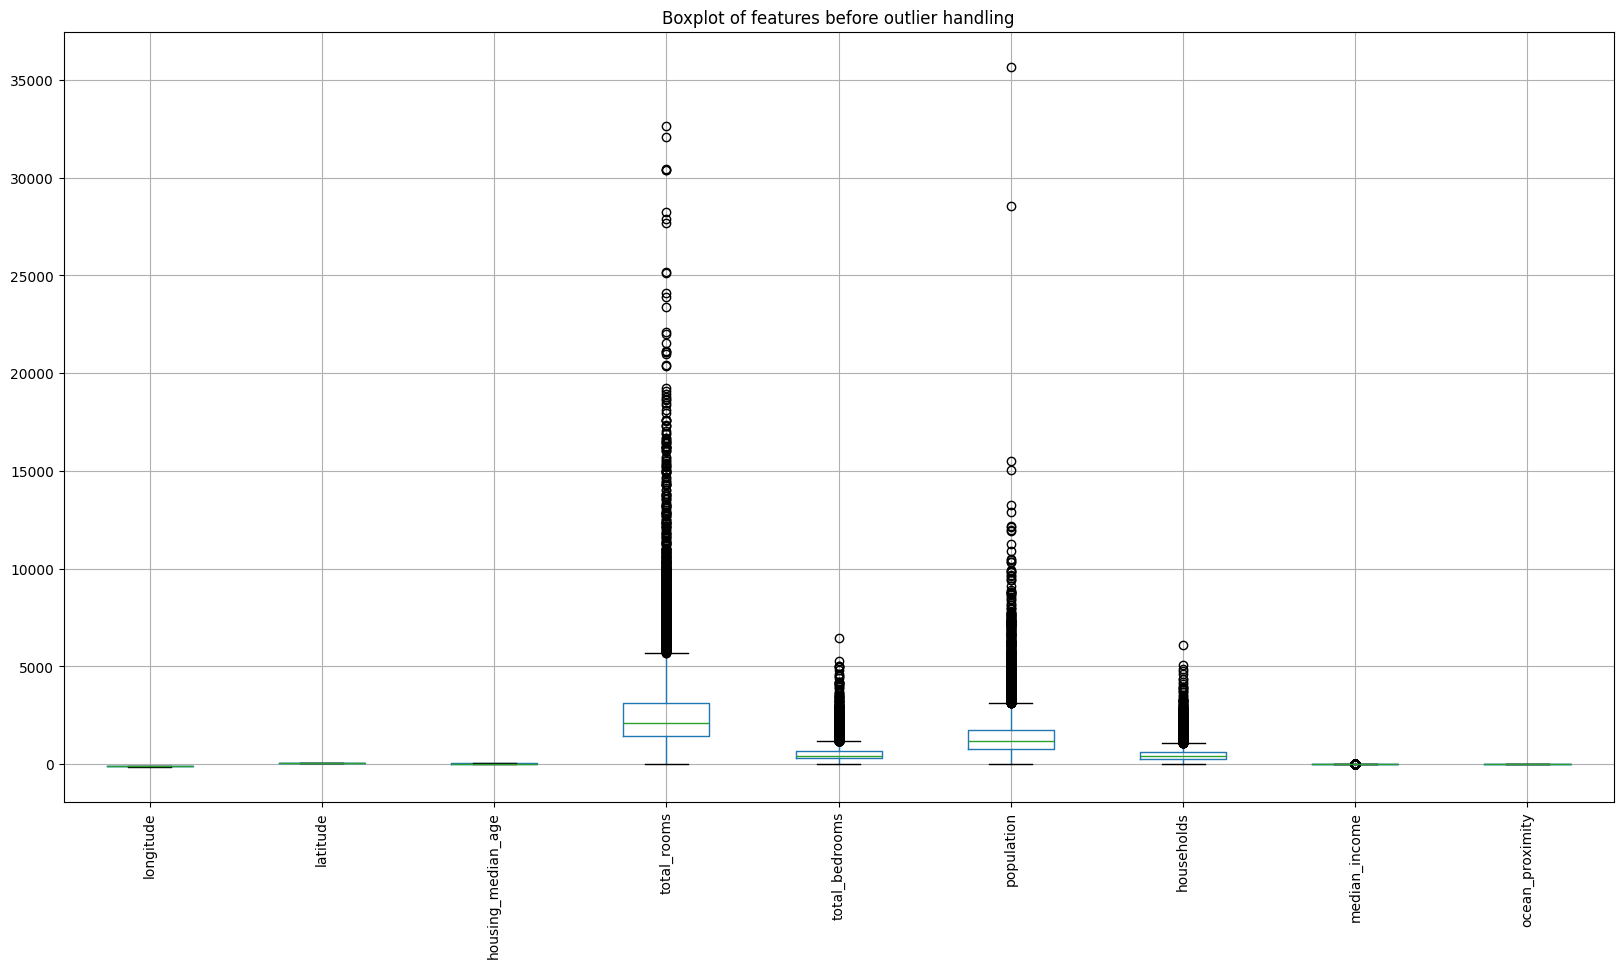

Number of data points remaining after outlier handling: 9246


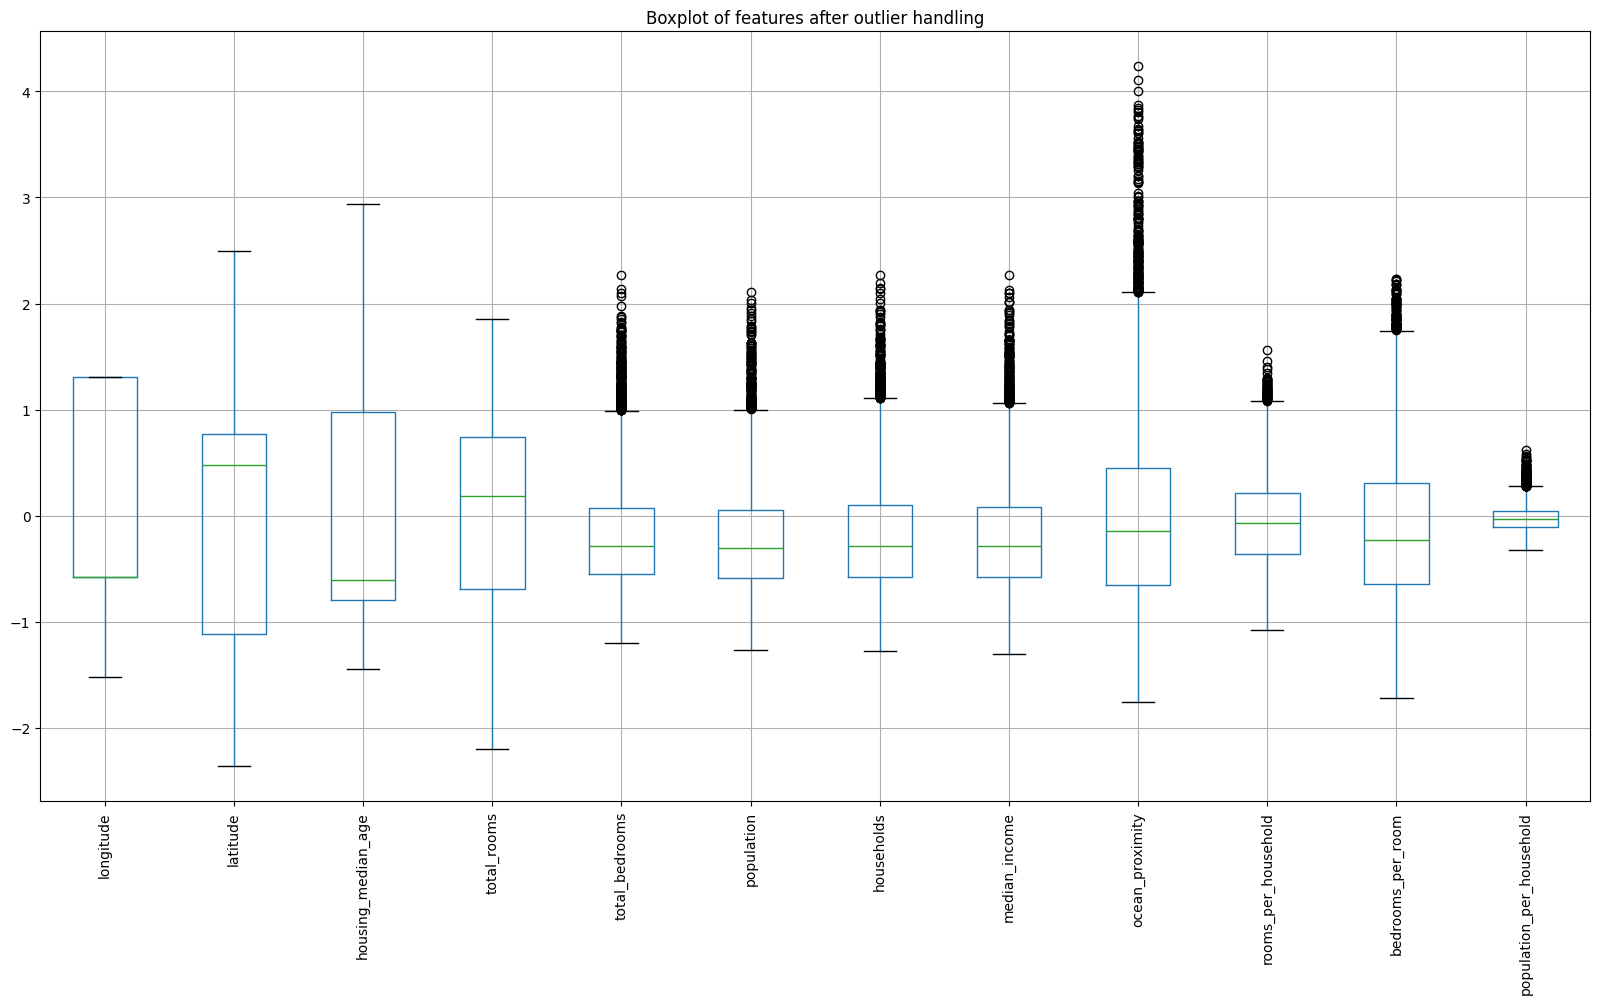

In [43]:
# Number of data points before outlier handling
num_data_points_before = X_train_transformed.shape[0]
print(f"Number of data points before outlier handling: {num_data_points_before}")

# Create boxplots for each column before outlier handling
plt.figure(figsize=(20, 10))
X.boxplot()
plt.title("Boxplot of features before outlier handling")
plt.xticks(rotation=90)
plt.show()

# Number of data points remaining after outlier handling
num_data_points_after = X_train_out.shape[0]
print(f"Number of data points remaining after outlier handling: {num_data_points_after}")

# Create boxplots for each column after outlier handling
plt.figure(figsize=(20, 10))
pd.DataFrame(X_filtered, columns=X_train.columns).boxplot()
plt.title("Boxplot of features after outlier handling")
plt.xticks(rotation=90)
plt.show()

These features show a large number of extreme values, indicating the presence of many outliers. The boxplots have long whiskers and numerous data points outside the whiskers, which are typical signs of outliers. These outliers are likely not just univariate outliers but also multivariate outliers, which can significantly impact model performance by skewing the dataset.

### After Preprocess and Outlier Handling

1. Features with reduced outliers:
    - The features that had significant outliers before (such as total_rooms, total_bedrooms, population, households) now show a more compact distribution. The number of data points outside the whiskers has been significantly reduced, indicating that the Elliptic Envelope method successfully identified and removed many outliers.
    - The Elliptic Envelope method is specifically designed to handle multivariate outliers. It considers the relationships between multiple features simultaneously, which allows it to identify data points that deviate from the expected multivariate distribution. This is crucial in high-dimensional datasets where outliers might not be apparent in any single dimension but become obvious when considering multiple dimensions together.
2. Normalization:
    - This standardization helps in improving the performance of machine learning models by ensuring that each feature contributes equally to the model training process.
    - By normalizing the data, we also mitigate the influence of multivariate outliers. Standardization ensures that the features are on the same scale, making it easier to detect and handle multivariate outliers.

**The Elliptic Envelope** method has **effectively identified and removed multivariate outliers from the dataset**, **leading to a more compact and normalized distribution of features**. This preprocessing step is crucial for improving the performance and robustness of machine learning models. **Multivariate outliers can distort the relationships between features**, **leading to biased model parameters and poor generalization to new data**. By addressing these outliers, the preprocessing step helps in building more reliable and accurate models.

In [44]:
# Extract the best parameters and the associated model
best_model_name = best_rmspe_result_after_tunning['Model']
best_parameters = best_rmspe_result_after_tunning['Parameters']

# Find the model and parameter grid
best_model_info = next((name, model, param_grid) for name, model, param_grid in best_model if name == best_model_name)
best_model_instance = best_model_info[1]

# Filter valid parameters for the best model
valid_params = {key: value for key, value in best_parameters.items() if key in best_model_instance.get_params()}

# Reinitialize the model with the best parameters
best_model_instance.set_params(**valid_params)

# Create a pipeline with the model
final_model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', best_model_instance)
])

# Fit the model on the entire training data
final_model.fit(X_train_out, y_train_out)

# Save the model and the scaler to files
joblib.dump(final_model, 'gb_california_model.pkl')
joblib.dump(y_pipeline, 'inverse_pipeline.pkl')

print("Model and scaler saved successfully with the best parameters.")

Model and scaler saved successfully with the best parameters.


### 9. Final Validation:

In [45]:
# Predict on the test data
y_test_pred = final_model.predict(X_test_out)

# Load the y scaler
y_scaler = joblib.load('inverse_pipeline.pkl')

# Transform predictions back to original scale
y_test_pred_original = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_out.reshape(-1, 1)).flatten()

# Calculate metrics
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_original, y_test_pred_original)
test_rmspe = rmspe(y_test_original, y_test_pred_original)
test_mape = mape(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)

print("Validation metrics on test data:")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSPE: {test_rmspe}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")

Validation metrics on test data:
Test MSE: 1838164223.4539459
Test RMSE: 42873.817458373655
Test MAE: 28633.43214708421
Test RMSPE: 28.39293922911514
Test MAPE: 15.57019360186665
Test R2: 0.8563025154878052


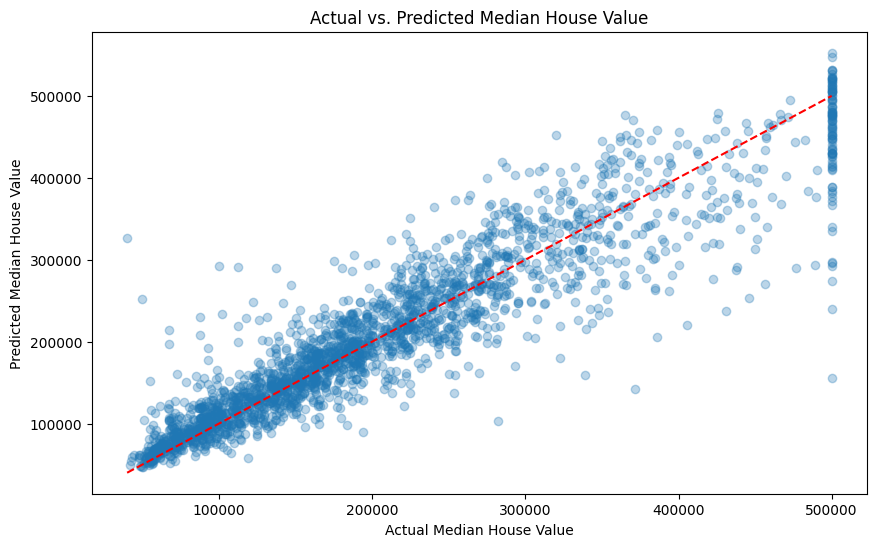

In [46]:
# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_test_pred_original, alpha=0.3)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value')
plt.show()

In [47]:
# Example of loading the model and making a prediction
loaded_model = joblib.load('gb_california_model.pkl')
loaded_y_scaler = joblib.load('inverse_pipeline.pkl')

# Predict on the test data using the loaded model
y_test_pred_loaded = loaded_model.predict(X_test_out)
y_test_pred_loaded_original = loaded_y_scaler.inverse_transform(y_test_pred_loaded.reshape(-1, 1)).flatten()

print("Loaded model predictions match the original predictions:", 
      np.allclose(y_test_pred_original, y_test_pred_loaded_original))

Loaded model predictions match the original predictions: True


In [48]:
# Function to preprocess new data
def preprocess_new_data(new_data):
    # Encode 'ocean_proximity'
    new_data['ocean_proximity'] = new_data['ocean_proximity'].replace({'ISLAND': 0, 'NEAR OCEAN': 1, '<1H OCEAN': 2, 'NEAR BAY': 3, 'INLAND': 4})
    
    # Create new features
    new_data['rooms_per_household'] = new_data['total_rooms'] / new_data['households']
    new_data['bedrooms_per_room'] = new_data['total_bedrooms'] / new_data['total_rooms']
    new_data['population_per_household'] = new_data['population'] / new_data['households']
    
    return new_data

# Load the model and pipeline from the file
loaded_model = joblib.load('gb_california_model.pkl')
loaded_y_scaler = joblib.load('inverse_pipeline.pkl')

# Example new data
new_data = pd.DataFrame({
    'longitude': [-122.23],
    'latitude': [37.88],
    'housing_median_age': [41],
    'total_rooms': [880],
    'total_bedrooms': [129],
    'population': [322],
    'households': [126],
    'median_income': [8.3252],
    'ocean_proximity': ['NEAR BAY']
})

cheap_house = pd.DataFrame({
    'longitude': [-124.35],
    'latitude': [40.58],
    'total_rooms': [1.0],
    'total_bedrooms': [1.0],
    'population': [2.0],
    'households': [1.0],
    'median_income': [0.5],
    'housing_median_age': [50.0],
    'ocean_proximity': ['ISLAND']
})

expensive_house = pd.DataFrame({
    'longitude': [-124.35],
    'latitude': [40.58],
    'total_rooms': [10000.0],
    'total_bedrooms': [1000.0],
    'population': [3000.0],
    'households': [1000.0],
    'median_income': [15.0],
    'housing_median_age': [5.0],
    'ocean_proximity': ['INLAND']
})

# Preprocess the new data
new_data_preprocessed = preprocess_new_data(new_data)
cheap_house_preprocessed = preprocess_new_data(cheap_house)
expensive_house_preprocessed = preprocess_new_data(expensive_house)

# Make predictions with the loaded pipeline
predictions_scaled = loaded_model.predict(new_data_preprocessed)
cheap_predictions_scaled = loaded_model.predict(cheap_house_preprocessed)
expensive_predictions_scaled = loaded_model.predict(expensive_house_preprocessed)

# Apply inverse scaling to the predictions
predictions = loaded_y_scaler.transform(predictions_scaled.reshape(-1, 1))
cheap_predictions = loaded_y_scaler.transform(cheap_predictions_scaled.reshape(-1, 1))
expensive_predictions = loaded_y_scaler.transform(expensive_predictions_scaled.reshape(-1, 1))

# Print the predictions
print("Predictions for the new data:", predictions)
print("Predictions for the cheap house:", cheap_predictions)
print("Predictions for the expensive house:", expensive_predictions)

Predictions for the new data: [[-1.79575285]]
Predictions for the cheap house: [[-1.79577084]]
Predictions for the expensive house: [[-1.79575271]]


C:\Users\Hadi\AppData\Local\Temp\ipykernel_13572\2265565968.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data['ocean_proximity'] = new_data['ocean_proximity'].replace({'ISLAND': 0, 'NEAR OCEAN': 1, '<1H OCEAN': 2, 'NEAR BAY': 3, 'INLAND': 4})
C:\Users\Hadi\AppData\Local\Temp\ipykernel_13572\2265565968.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data['ocean_proximity'] = new_data['ocean_proximity'].replace({'ISLAND': 0, 'NEAR OCEAN': 1, '<1H OCEAN': 2, 'NEAR BAY': 3, 'INLAND': 4})
C:\Users\Hadi\AppData\Local\

## Explainable AI (XAI)

### Introduction to Explainable AI (XAI)
Explainable AI (XAI) refers to methods and techniques in the application of artificial intelligence (AI) such that the results of the solution can be understood by human experts. It contrasts with the concept of a "black box" in machine learning where even the creators cannot explain why the AI arrived at a specific decision.

### Importance of Explainable AI in Housing Price Prediction
In the context of predicting housing prices, explainability helps stakeholders understand the key factors driving model predictions. This understanding is crucial for gaining trust, identifying potential biases, and ensuring the model's decisions align with domain knowledge.

### Methods for Explainability
There are several methods to interpret and explain model predictions:

- **Feature Importance:** This method ranks the input features based on their importance to the predictions.
- **Partial Dependence Plots (PDPs):** These plots show the relationship between a feature and the predicted outcome, marginalizing over the values of all other features.
- **SHAP Values:** SHapley Additive exPlanations (SHAP) provide a unified measure of feature importance for individual predictions.

### Implementing Explainable AI Methods
We will use the following methods to interpret our model:
1. **Feature Importance**
2. **SHAP Values**

#### Feature Importance

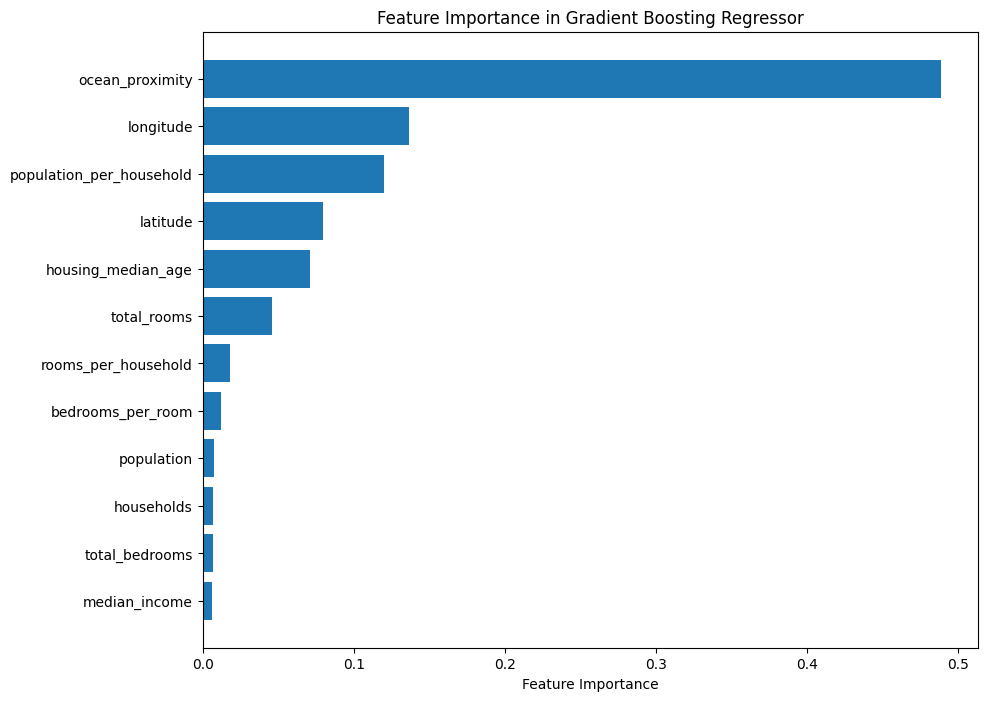

In [49]:
# Original feature names from X.columns
original_feature_names = list(X.columns)

# Adding new features created during preprocessing
additional_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
all_feature_names = original_feature_names + additional_features

# Access the GradientBoostingRegressor step from the pipeline
gbr_model = final_model.named_steps['regressor']

# Get feature importance
feature_importance = gbr_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(all_feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Regressor')
plt.show()

- **ocean_proximity:** This feature has the highest importance by a significant margin. It indicates that the proximity to the ocean is a **crucial factor in predicting the target variable**, likely the housing price.

- **longitude:** The second most important feature. Longitude, together with latitude, often represents the geographic location, which can be crucial in real estate pricing.

- **population_per_household:** This feature is the third most important. It suggests that areas with higher population per household have a significant impact on the prediction.

- **latitude:** Another geographic feature, indicating that the north-south positioning also plays a significant role in determining the target variable.

- **housing_median_age:** The age of the housing stock is also an important factor, suggesting that older or newer housing developments may affect the predictions.

- **total_rooms:** This feature, representing the total number of rooms in the household, also has considerable importance. Larger houses might be more valuable.

- **rooms_per_household:** The number of rooms per household also plays a role, though less significant compared to the other features mentioned above.

- **bedrooms_per_room:** This feature, while important, has a relatively smaller impact. It might indicate the ratio of bedrooms to total rooms, possibly reflecting the layout or luxury of the house.

- **population:** The overall population has a small but noticeable impact on the predictions.

- **total_bedrooms**: The total number of bedrooms has a minor but still present importance.

- **households:** The number of households affects the predictions but to a lesser extent compared to other features.

- **median_income:** Surprisingly, this feature has the least importance in the model. This could be because the geographical features and specific housing characteristics are more directly correlated with the target variable in this particular dataset.

Overall, geographic features (latitude and longitude), proximity to the ocean, and specific housing characteristics like total rooms and housing median age are the most important predictors in this model. Economic factors like median income appear to have less impact, which might be specific to the dataset and region being analyzed.

#### SHAP Values

c:\Users\Hadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


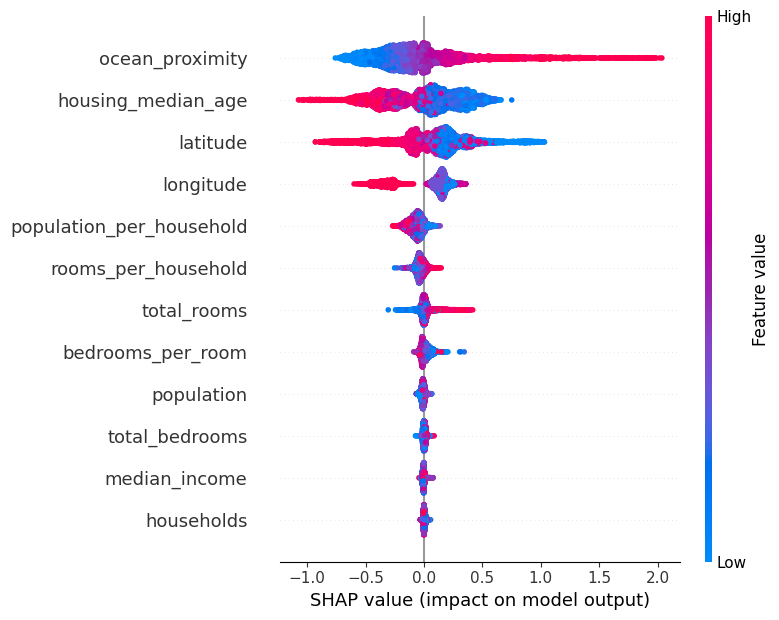

In [50]:
import shap

# Feature names including the additional ones created during preprocessing
original_feature_names = list(X.columns)
additional_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
all_feature_names = original_feature_names + additional_features

# Access the GradientBoostingRegressor step from the pipeline
gbr_model = final_model.named_steps['regressor']

# Create a SHAP explainer
explainer = shap.TreeExplainer(gbr_model)
shap_values = explainer.shap_values(X_train_out)

# Summary plot
shap.summary_plot(shap_values, X_train_out, feature_names=all_feature_names)


### Interpreting the Results

- **Color coding:**
    - The color represents the feature value (red for high values and blue for low values).
- **SHAP values:**
    - SHAP values on the x-axis represent the impact on the model's prediction (positive or negative).

### Interpretation of each feature:

1. ocean_proximity:
    - High values have a strong positive impact on the model output.
    - The plot indicates that higher values of ocean_proximity (which likely correspond to being closer to "INLAND") have a strong positive impact on housing prices. This suggests that as the proximity to "INLAND" increases (i.e., as the value for ocean_proximity increases), the housing prices tend to be higher.
    - Low values have a strong negative impact, indicating that being far from the ocean decreases the predicted target value.
    - The lower SHAP values (in blue) for ocean_proximity represent areas farther from "INLAND" (like "ISLAND", "NEAR OCEAN", "<1H OCEAN", and "NEAR BAY"). These areas are associated with lower housing prices in the model.
2. housing_median_age:
    - Higher housing_median_age values (red dots) are associated with lower house prices. This suggests that older houses tend to be cheaper in this dataset.
    - Lower housing_median_age values (blue dots) are associated with higher house prices, indicating that newer houses tend to be more expensive.
3. latitude:
    - The latitude feature shows a more complex pattern, but generally, higher latitude values (more northern locations) have a negative impact on the prediction.
4. longitude:
    - Higher longitude values (more eastern locations) tend to have a negative impact on the model’s predictions.
5. population_per_household:
    - Higher population per household tends to have a negative impact on the predictions.
    - Lower values tend to have a positive impact, suggesting that less crowded households might be associated with higher target values.
6. rooms_per_household:
    - Higher values generally have a positive impact, indicating that more rooms per household can increase the predicted target value.
7. total_rooms:
    - Higher values of total rooms tend to have a positive impact on the predictions, which is intuitive as larger houses might be more valuable.
8. bedrooms_per_room:
    - Higher values have a slightly negative impact, which could indicate that a higher ratio of bedrooms might not necessarily increase the target value.
9. population:
    - The impact of the population feature is less pronounced but generally, higher population values have a slight negative impact.
10. total_bedrooms:
    - Similar to total rooms, higher values of total bedrooms have a positive impact on the predictions.
11. median_income:
    - Surprisingly, median income has a less pronounced impact on the model’s predictions, which might be specific to this dataset or the way other features capture similar information.
12. households:
    - Higher values have a slight negative impact, indicating that more households might slightly decrease the predicted target value.

### Overall Insights:

- Geographic features such as ocean_proximity, latitude, and longitude have significant impacts on the model’s predictions.
- Housing characteristics such as total_rooms, total_bedrooms, and rooms_per_household also play crucial roles.
- Some economic or demographic features like population_per_household and households have notable impacts, while others like median_income have less influence in this particular model.

These insights can guide further feature engineering or model adjustments to improve predictive performance.

### Interpreting the Metrics for Cost Efficiency

1. Model Accuracy:
    - RMSE of 42900.46 indicates that the **average error magnitude is around $42,900.46**, which accounts for larger errors more heavily.
    - RMSPE of 28.40% provide insight into the relative error in percentage terms, indicating that the **average error is about 28.40% of the actual house prices**.
2. Model Efficiency:
    - With an R2 of 0.8561, your model explains a **significant portion of the variance in house prices**, which is a strong indicator of good predictive performance.

### Evaluating Cost Efficiency:

iven that the model explains a large portion of variance (high R2) and has a reasonable percentage error (RMSPE), it could potentially lead to better pricing decisions and increased revenue. Let's assume this leads to similar benefits as mentioned before:

**Example Calculation (using hypothetical values for illustration)**:

1. R2 Cost Calculation:
- Better Pricing Decisions:
    - Scenario: Let's say your real estate business sells 100 houses per year, with an average price of $300,000.
    - Impact: If the model's high R2 enables more accurate pricing, you might reduce overpricing and underpricing.
- Revenue Increase:
    - Current Revenue: Without the model, let's assume your average house price is off by 5% due to less accurate pricing.
    - Model Impact: With the model, you might reduce this error to 2%. The 3% improvement (5% - 2%) can be translated into revenue increase.
- Calculation:
    - Average house price: $300,000
    - Total houses sold: 100
    - Potential revenue without model: 100 * $300,000 = $30,000,000
    - Improved pricing accuracy (3% of $300,000): $9,000 per house
    - Additional revenue: 100 houses * $9,000 = $900,000

2. RMSPE Cost Calculation:
- Cost of Prediction Errors:
    - Scenario: Let's say the average house price is $300,000, and your RMSPE is 28.40%.
    - Impact: An error of 28.40% translates to approximately $85,200 (28.40% of $300,000) per house.

- Improvement Potential:
    - If you reduce RMSPE from 28.40% to 20% when improving in the future, the error per house drops to $60,000 (20% of $300,000).
    - Savings per House: $85,200 - $60,000 = $25,200
    - Total Savings: For 100 houses, this translates to $25,200 * 100 = $2,520,000

3. Calculation Metric:

    ROI= ((Total Benefits − Total Costs) / Total Costs) * 100
    ​
    Revenue Increase:
    - Improved pricing accuracy (3% improvement): $900,000 additional revenue

    Cost Savings:
    - Reduced prediction error (from RMSPE improvement): $2,520,000 savings

    Total Benefits = Revenue Increase + Cost Savings = $900,000 + $2,520,000 = $3,420,000

    Total Costs (Illustration):
    - Development Costs: $150,000
    - Annual Operational Costs: $60,000
    - Total Costs: $150,000 + $60,000 = $210,000

    ROI: (($3,420,000 − $210,000) / $210,000) * 100 = 1528.57%

    The **1528.57% Return on Investment (ROI)** means that for every dollar you spend on developing and operating your house price prediction model, you are getting back **approximately $15.29 in benefits**. 